In [1]:
import scipy.io 
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import cm 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd 
import networkx as nx
# Ref : https://python-louvain.readthedocs.io/en/latest/
import community

In [2]:
%matplotlib notebook 

In [3]:
#!git clone https://github.com/mariomulansky/PySpike.git
%cd \PySpike

/Users/simoneazeglio/Desktop/ComplessitàSistemiSociali/PySpike


In [4]:
!python3 setup.py build_ext --inplace

running build_ext
skipping 'pyspike/cython/cython_add.c' Cython extension (up-to-date)
skipping 'pyspike/cython/cython_profiles.c' Cython extension (up-to-date)
skipping 'pyspike/cython/cython_distances.c' Cython extension (up-to-date)
skipping 'pyspike/cython/cython_directionality.c' Cython extension (up-to-date)
skipping 'pyspike/cython/cython_simulated_annealing.c' Cython extension (up-to-date)


In [5]:
import pyspike as spk

In [6]:
%cd ..

/Users/simoneazeglio/Desktop/ComplessitàSistemiSociali


In [412]:
file1 = scipy.io.loadmat("TestData/Feb1312da06spks.mat")
file2 = scipy.io.loadmat("TestData/Jan1312da04spks.mat")
file3 = scipy.io.loadmat("TestData/Jan1912da02spks.mat")

In [418]:
neural_data1 = file1['spks'] # "spks" is arranged in [ID time] format (ID: neuron number; time: spike-time in seconds)
neural_data2 = file2['spks']
neural_data3 = file3['spks']

In [427]:
multi_dim_list1 = []
multi_dim_list2 = []
multi_dim_list3 = []
for i in range(1,126):
    multi_dim_list1.append(neural_data1[neural_data1[:,0] == i][:,1])
    
for i in range(1,103):
    multi_dim_list2.append(neural_data2[neural_data2[:,0] == i][:,1])
    multi_dim_list3.append(neural_data3[neural_data3[:,0] == i][:,1])

In [428]:
multi_dim_array1 = np.array(multi_dim_list1)
multi_dim_array2 = np.array(multi_dim_list2)
multi_dim_array3 = np.array(multi_dim_list3)

In [429]:
#Importing colormap 
viridis = cm.get_cmap('viridis', 125)
jet = cm.get_cmap('jet', 102)

<IPython.core.display.Javascript object>


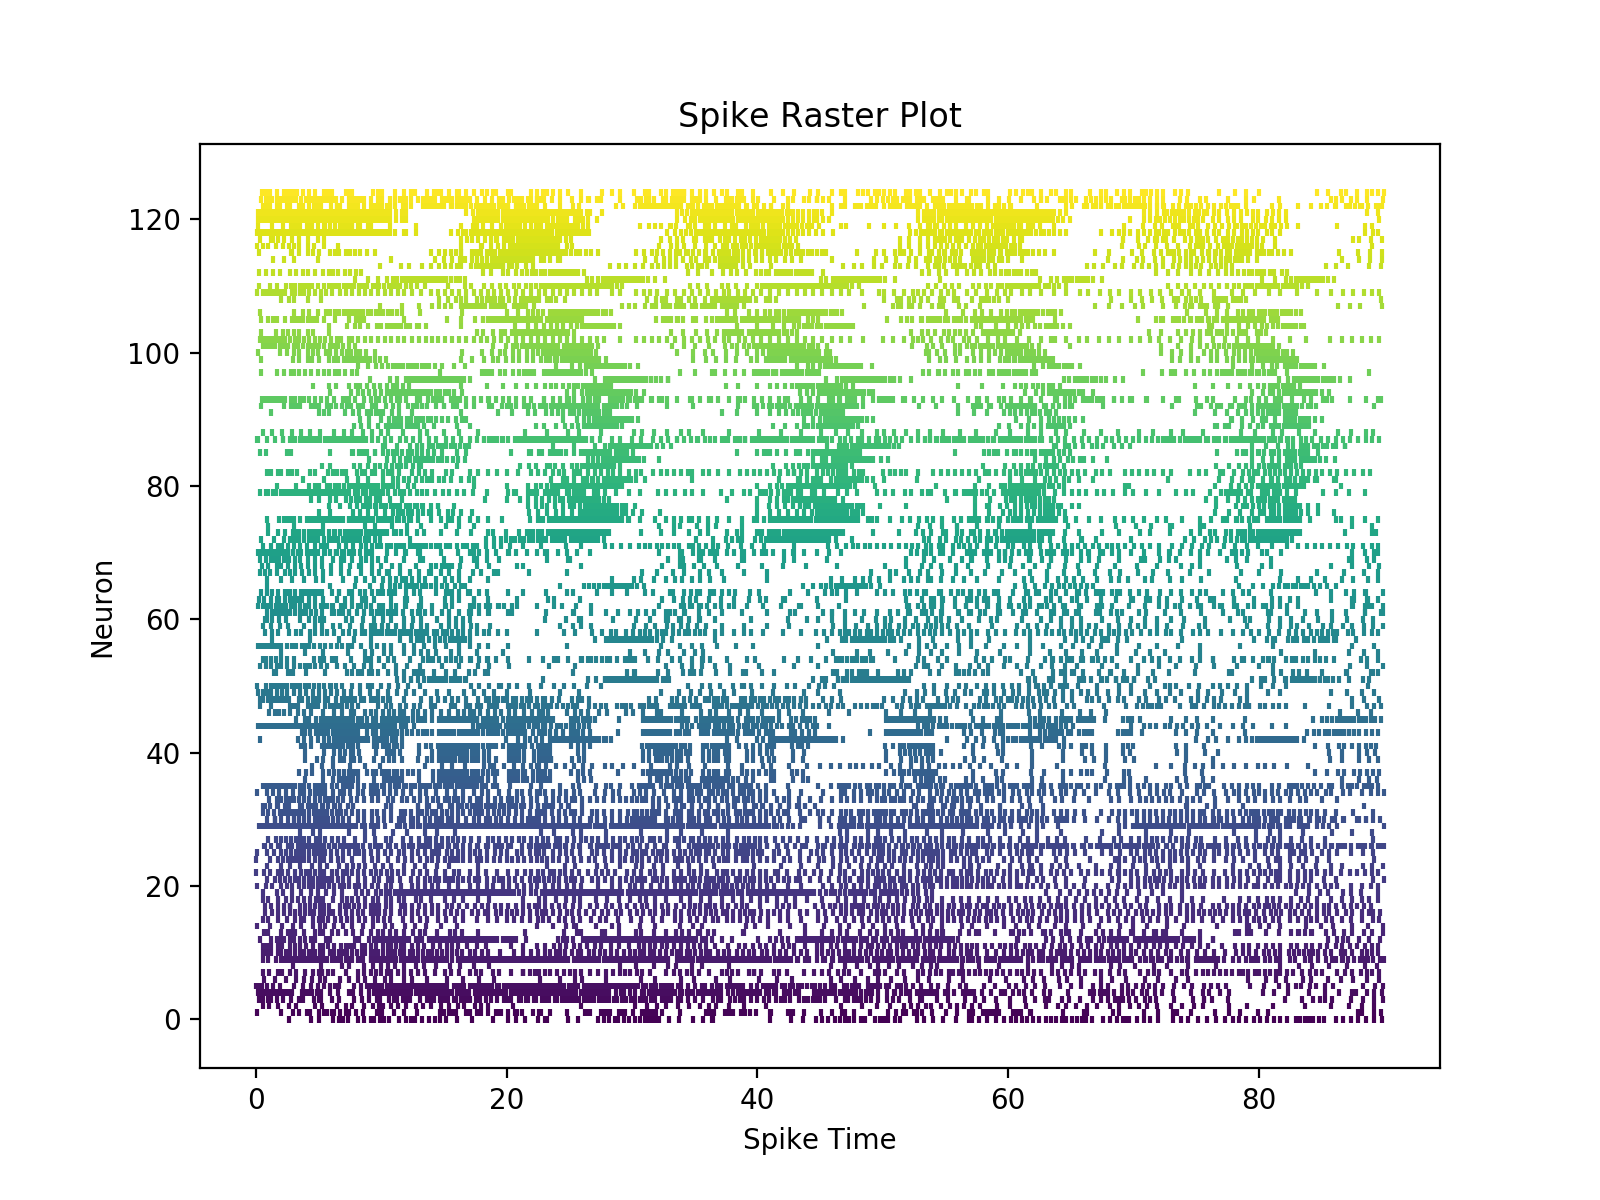

Text(0, 0.5, 'Neuron')

In [14]:
# Spike Raster Plot 
plt.figure(figsize=(8,6), num='Raster Raw Data1')
plt.eventplot(multi_dim_array1 , colors= viridis(np.linspace(0, 1, 125)))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


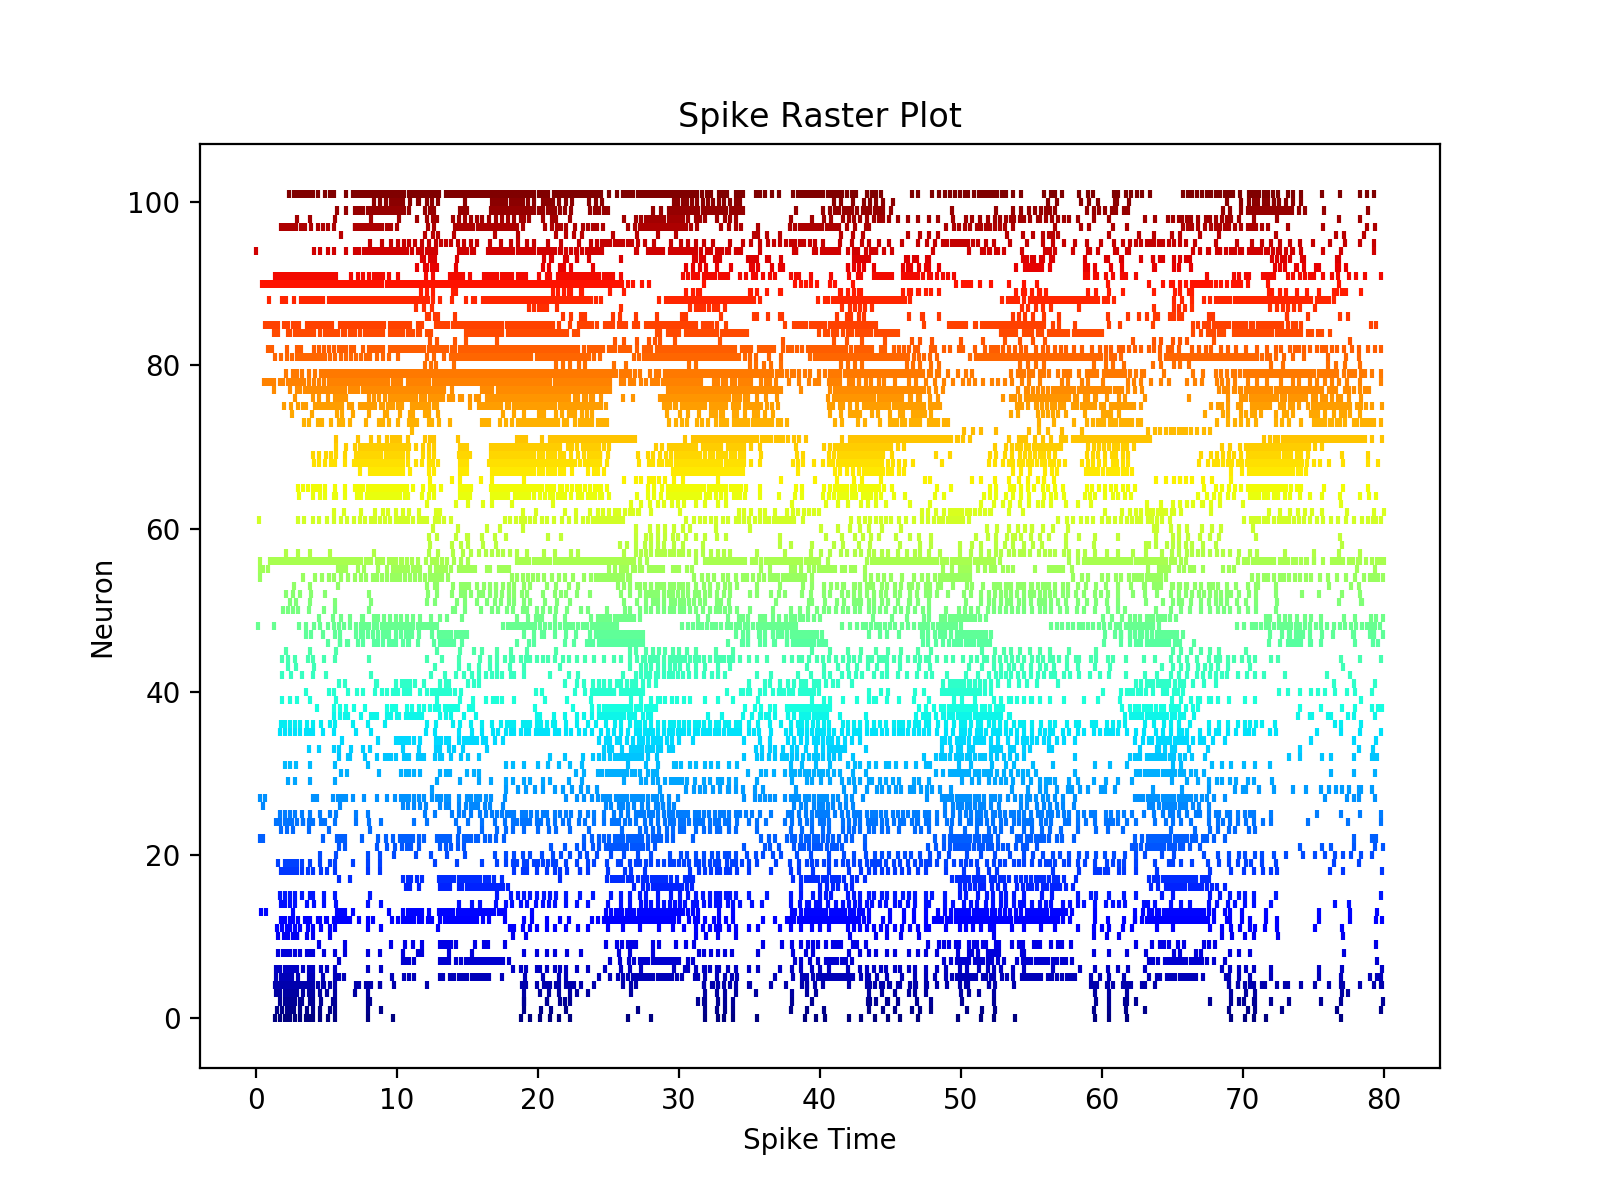

Text(0, 0.5, 'Neuron')

In [430]:
# Spike Raster Plot 
plt.figure(figsize=(8,6), num='Raster Raw Data2')
plt.eventplot(multi_dim_array2 , colors= jet(np.linspace(0, 1, 102)))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

In [17]:
import itertools

In [431]:
merged_multi_dim_list1 = list(itertools.chain(*multi_dim_list1))
merged_multi_dim_array1 = np.asarray(merged_multi_dim_list1)
merged_multi_dim_list2 = list(itertools.chain(*multi_dim_list2))
merged_multi_dim_array2 = np.asarray(merged_multi_dim_list2)
merged_multi_dim_list3 = list(itertools.chain(*multi_dim_list3))
merged_multi_dim_array3 = np.asarray(merged_multi_dim_list3)

<IPython.core.display.Javascript object>


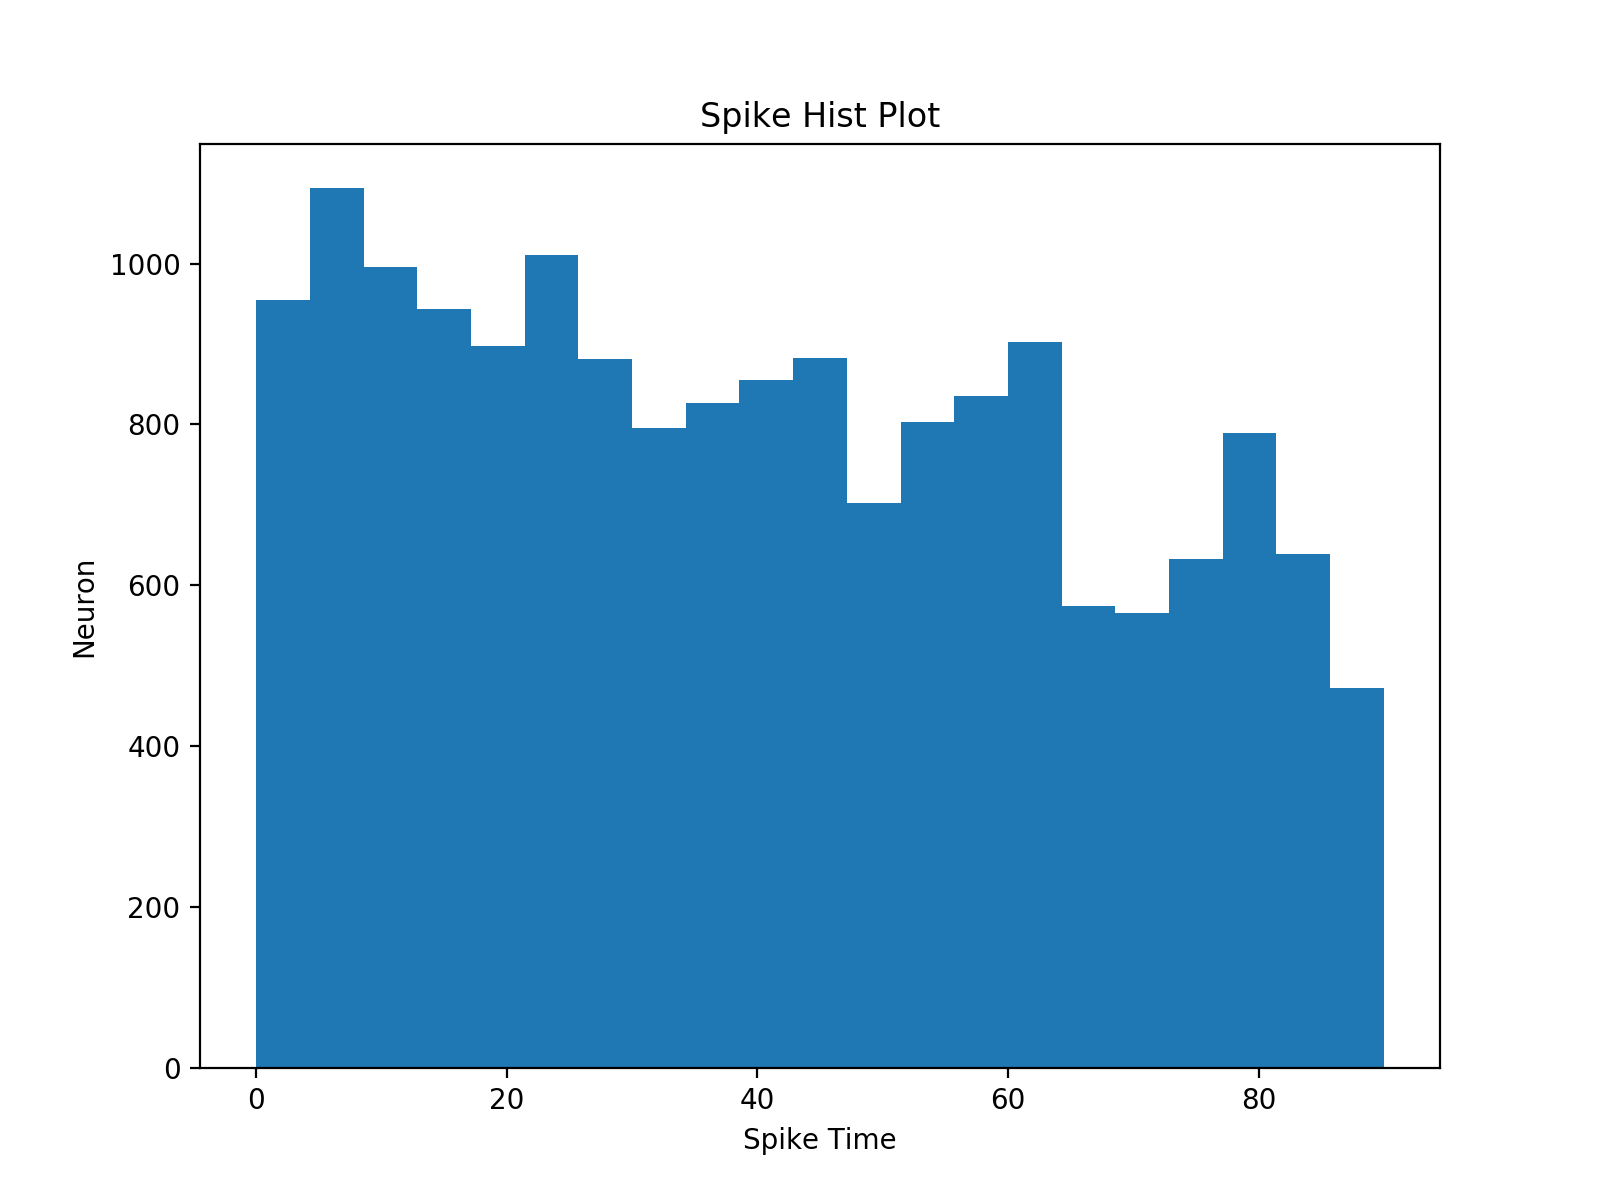

Text(0, 0.5, 'Neuron')

In [19]:
plt.figure(figsize=(8,6), num='Histogram Raw Data')
plt.hist(merged_multi_dim_array1, bins= 21 )
plt.title("Spike Hist Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


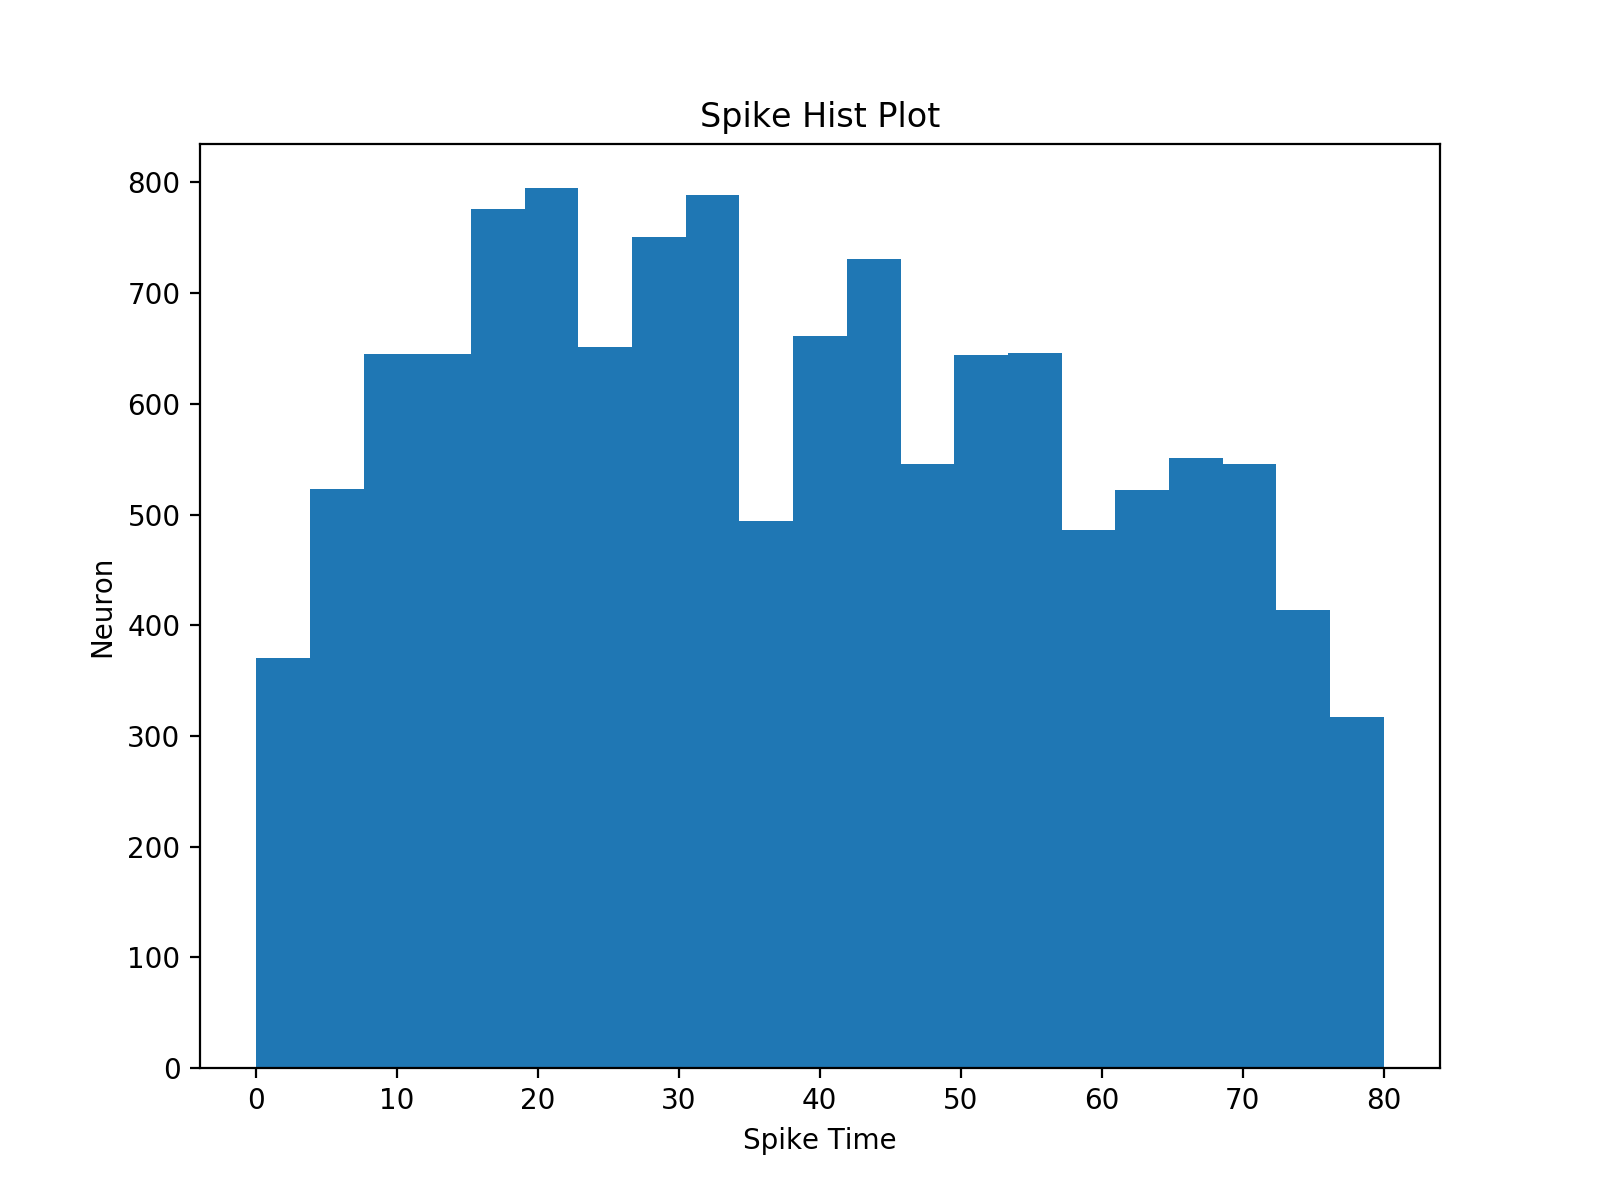

Text(0, 0.5, 'Neuron')

In [434]:
plt.figure(figsize=(8,6), num='Histogram Raw Data2')
plt.hist(merged_multi_dim_array2, bins= 21 )
plt.title("Spike Hist Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

In [20]:
neural_df1 = pd.DataFrame(multi_dim_array1, columns=["SpikeTime"])

http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony

### ISI Distance

In [21]:
# Using PySpike library 
spike_train0 = spk.SpikeTrain(neural_df1.SpikeTime[0], [0.0,90.0])
spike_train1 = spk.SpikeTrain(neural_df1.SpikeTime[1], [0.0,90.0])

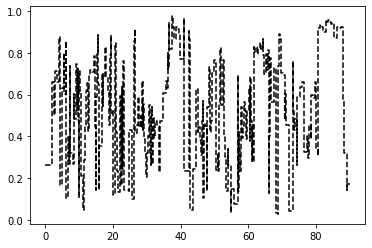

In [16]:
isi_profile = spk.isi_profile(spike_train0, spike_train1)
x, y = isi_profile.get_plottable_data()
plt.plot(x,y, "--k")

In [17]:
isi_dist = spk.isi_distance(spike_train0, spike_train1, interval=(0.0, 90.0))

In [ ]:
print(isi_dist)

### SPIKE Distance

In [ ]:
spike_profile = spk.spike_profile(spike_train0, spike_train1)
x,y = spike_profile.get_plottable_data()
plt.plot(x, y, "--k")

### Spike Synchronization 


In [ ]:
spike_sy_profile = spk.spike_sync_profile(spike_train0, spike_train1)
x, y = spike_sy_profile.get_plottable_data()
plt.plot(x, y, "--k")

### Multivariate profile and distances 

In [ ]:
#print(" ".join(str(x) for x in multi_dim_array1[0]))

In [ ]:
with open("prova_def.txt", "w") as file: 
    for i in range(0, 125):
        file.write(" ".join(str(x) for x in multi_dim_array1[i]) + "\n")

In [22]:
spike_trains = spk.load_spike_trains_from_txt("prova_def.txt",[0.0, 90.0], is_sorted = True)

<IPython.core.display.Javascript object>


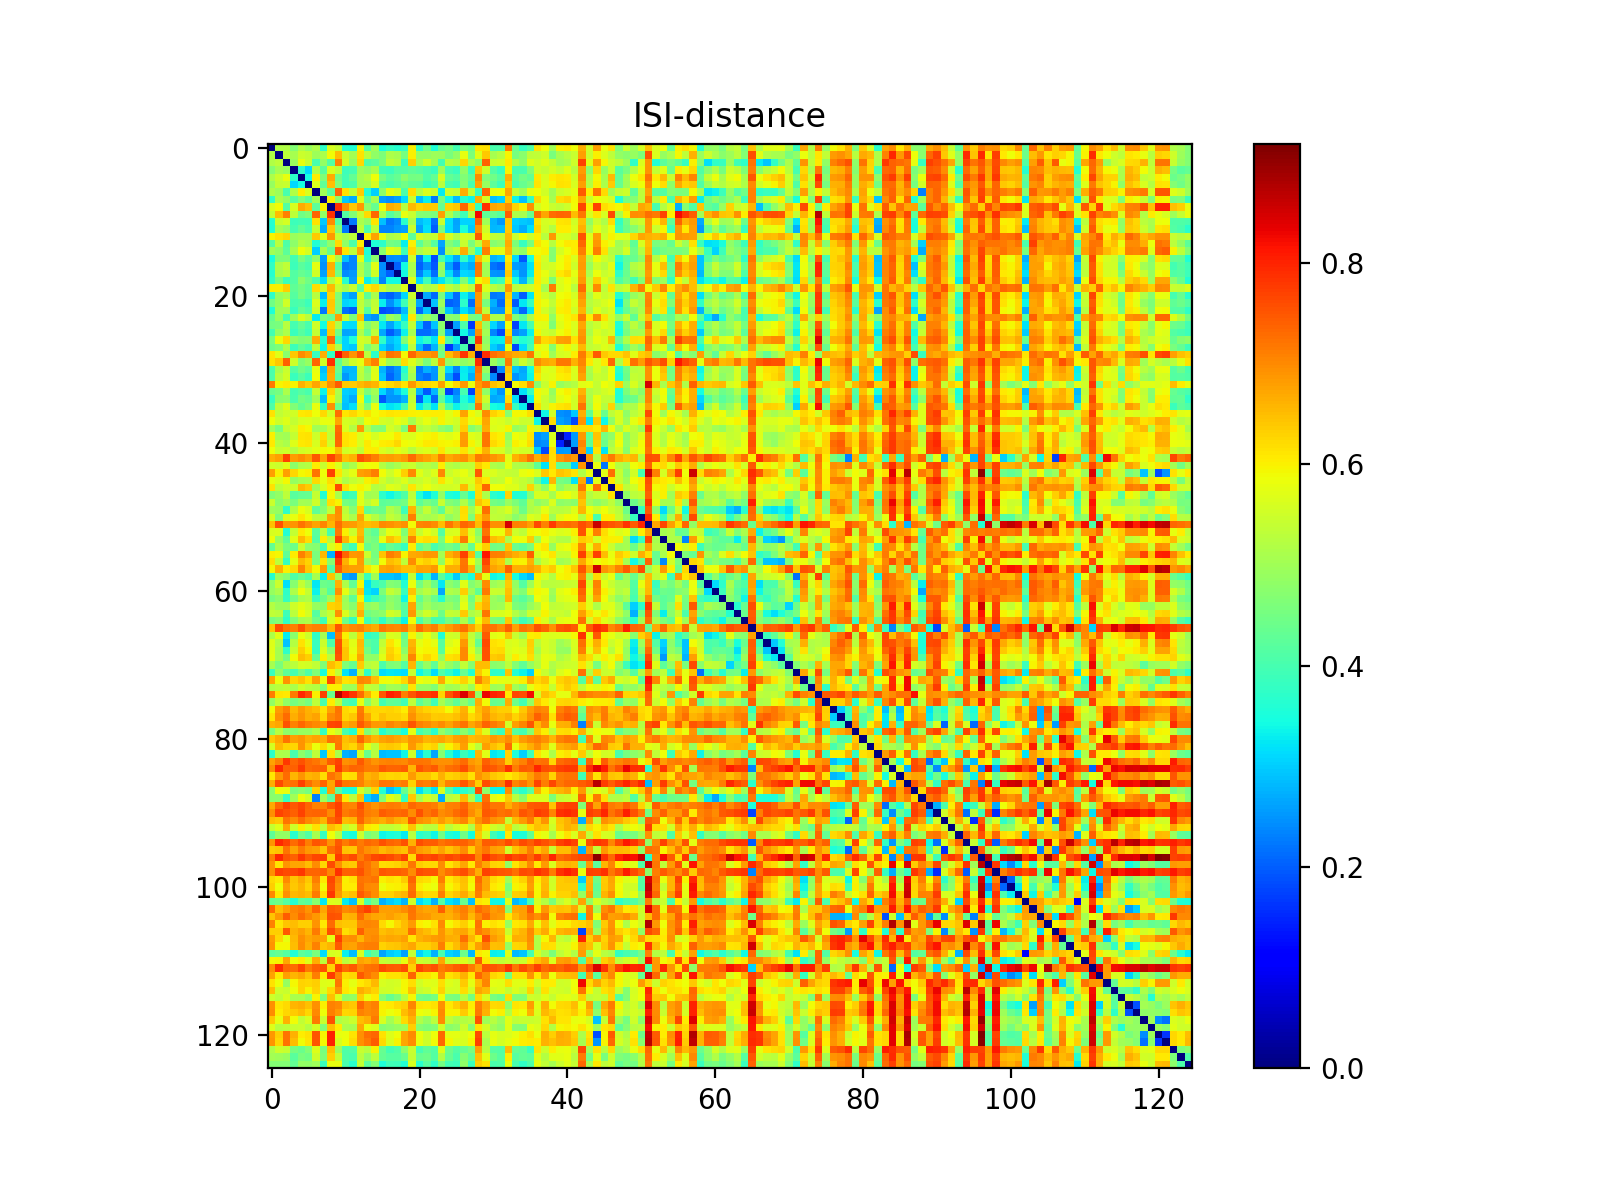

Text(0.5, 1.0, 'ISI-distance')

In [23]:
plt.figure(figsize=(8,6), num = "ISI Distance")
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none', cmap = "jet")
plt.colorbar()
plt.title("ISI-distance")

Text(0.5, 1.0, 'SPIKE-distance')

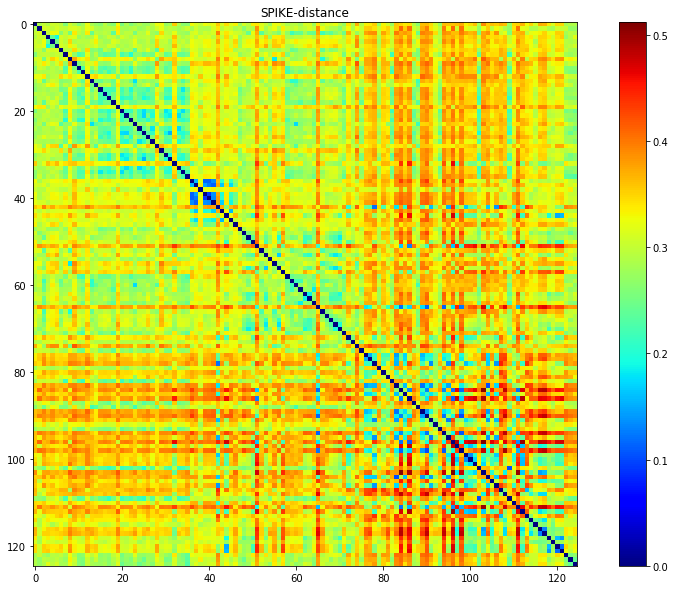

In [20]:
plt.figure(figsize=(15,10))
spike_distance = spk.spike_distance_matrix(spike_trains)
plt.imshow(spike_distance, interpolation='none', cmap="jet")
plt.colorbar()
plt.title("SPIKE-distance")

<IPython.core.display.Javascript object>


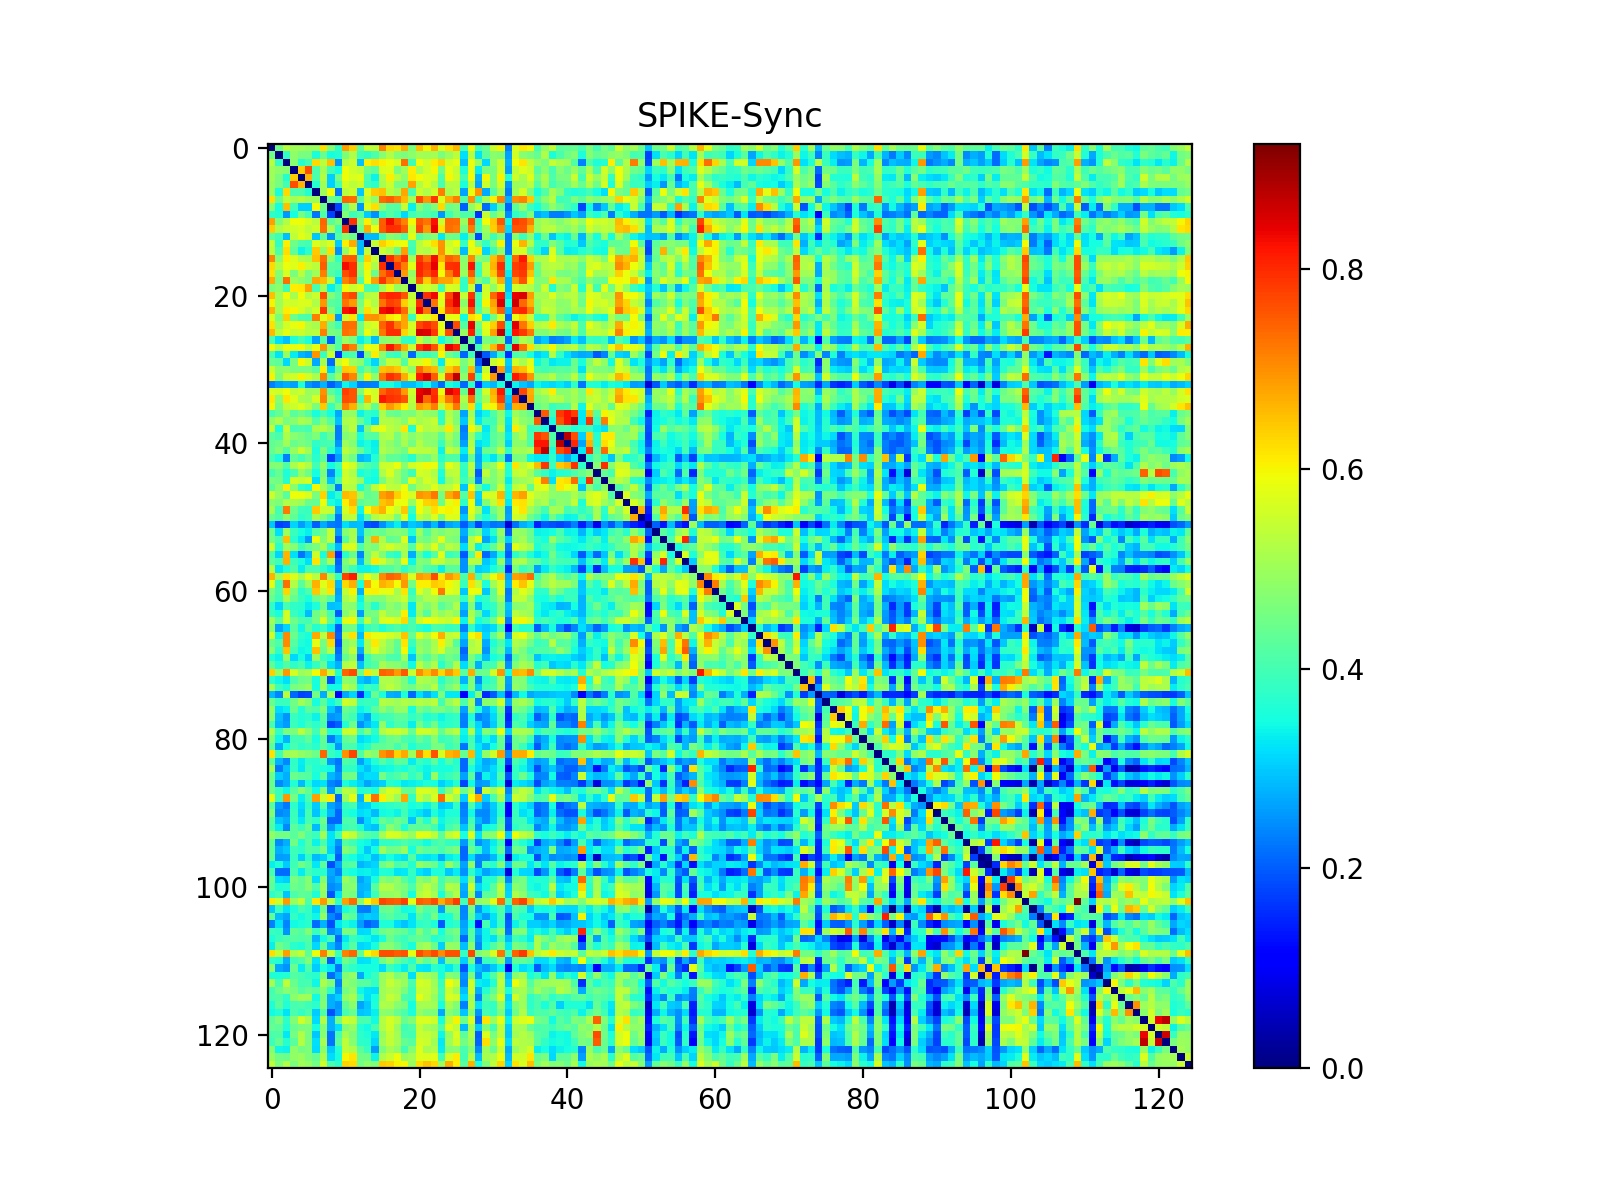

Text(0.5, 1.0, 'SPIKE-Sync')

In [17]:
plt.figure(figsize=(8,6))
spike_sync = spk.spike_sync_matrix(spike_trains)
plt.imshow(spike_sync, interpolation='none', cmap = "jet")
plt.colorbar()
plt.title("SPIKE-Sync")

In [22]:
F_init = spk.spike_train_order(spike_trains)
print("Initial Synfire Indicator for 125 spike trains:", F_init)

Initial Synfire Indicator for 125 spike trains: -0.0049562334894644585


In [18]:
D_init = spk.spike_directionality_matrix(spike_trains)
phi, _ = spk.optimal_spike_train_sorting(spike_trains)
F_opt = spk.spike_train_order(spike_trains, indices=phi)
print("Synfire Indicator of optimized spike train sorting:", F_opt)

Synfire Indicator of optimized spike train sorting: 0.010018361322847271


In [19]:
D_opt = spk.permutate_matrix(D_init, phi)

<IPython.core.display.Javascript object>


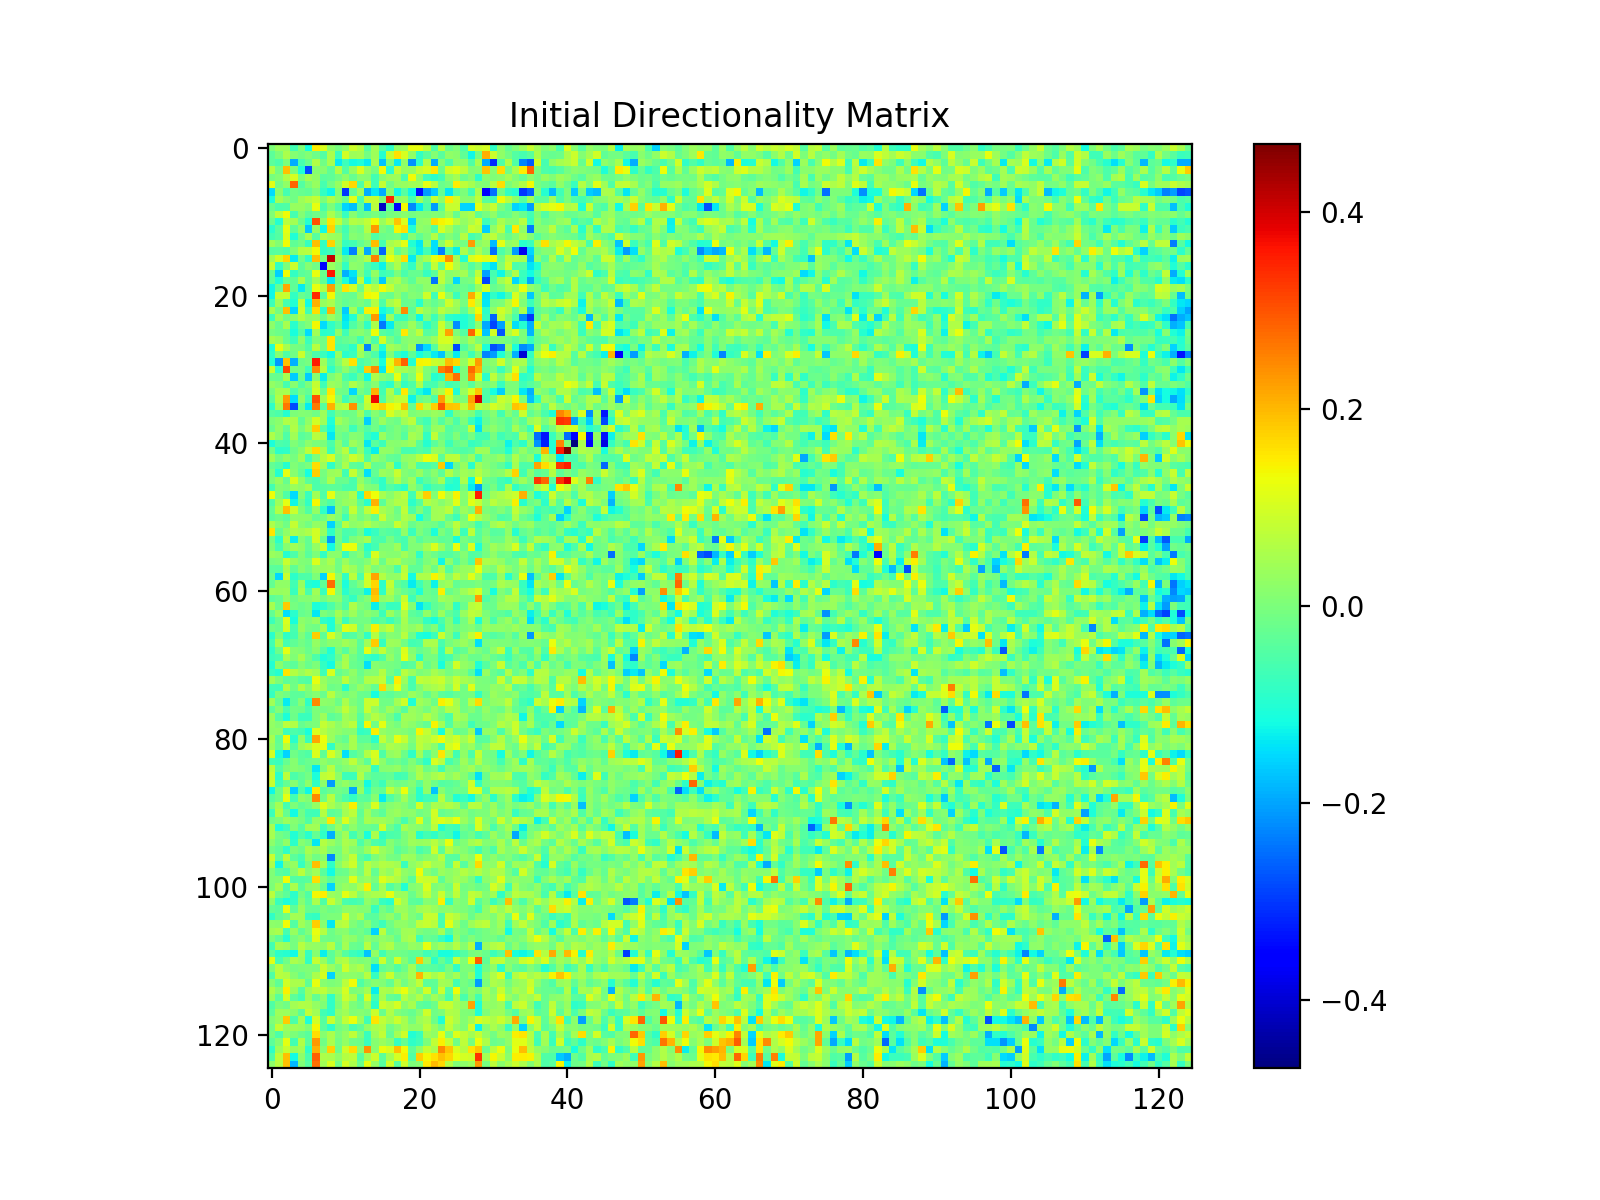

Text(0.5, 1.0, 'Initial Directionality Matrix')

In [21]:
plt.figure(figsize=(8, 6))
plt.imshow(D_init, cmap="jet")
plt.colorbar()
plt.title("Initial Directionality Matrix")

<IPython.core.display.Javascript object>


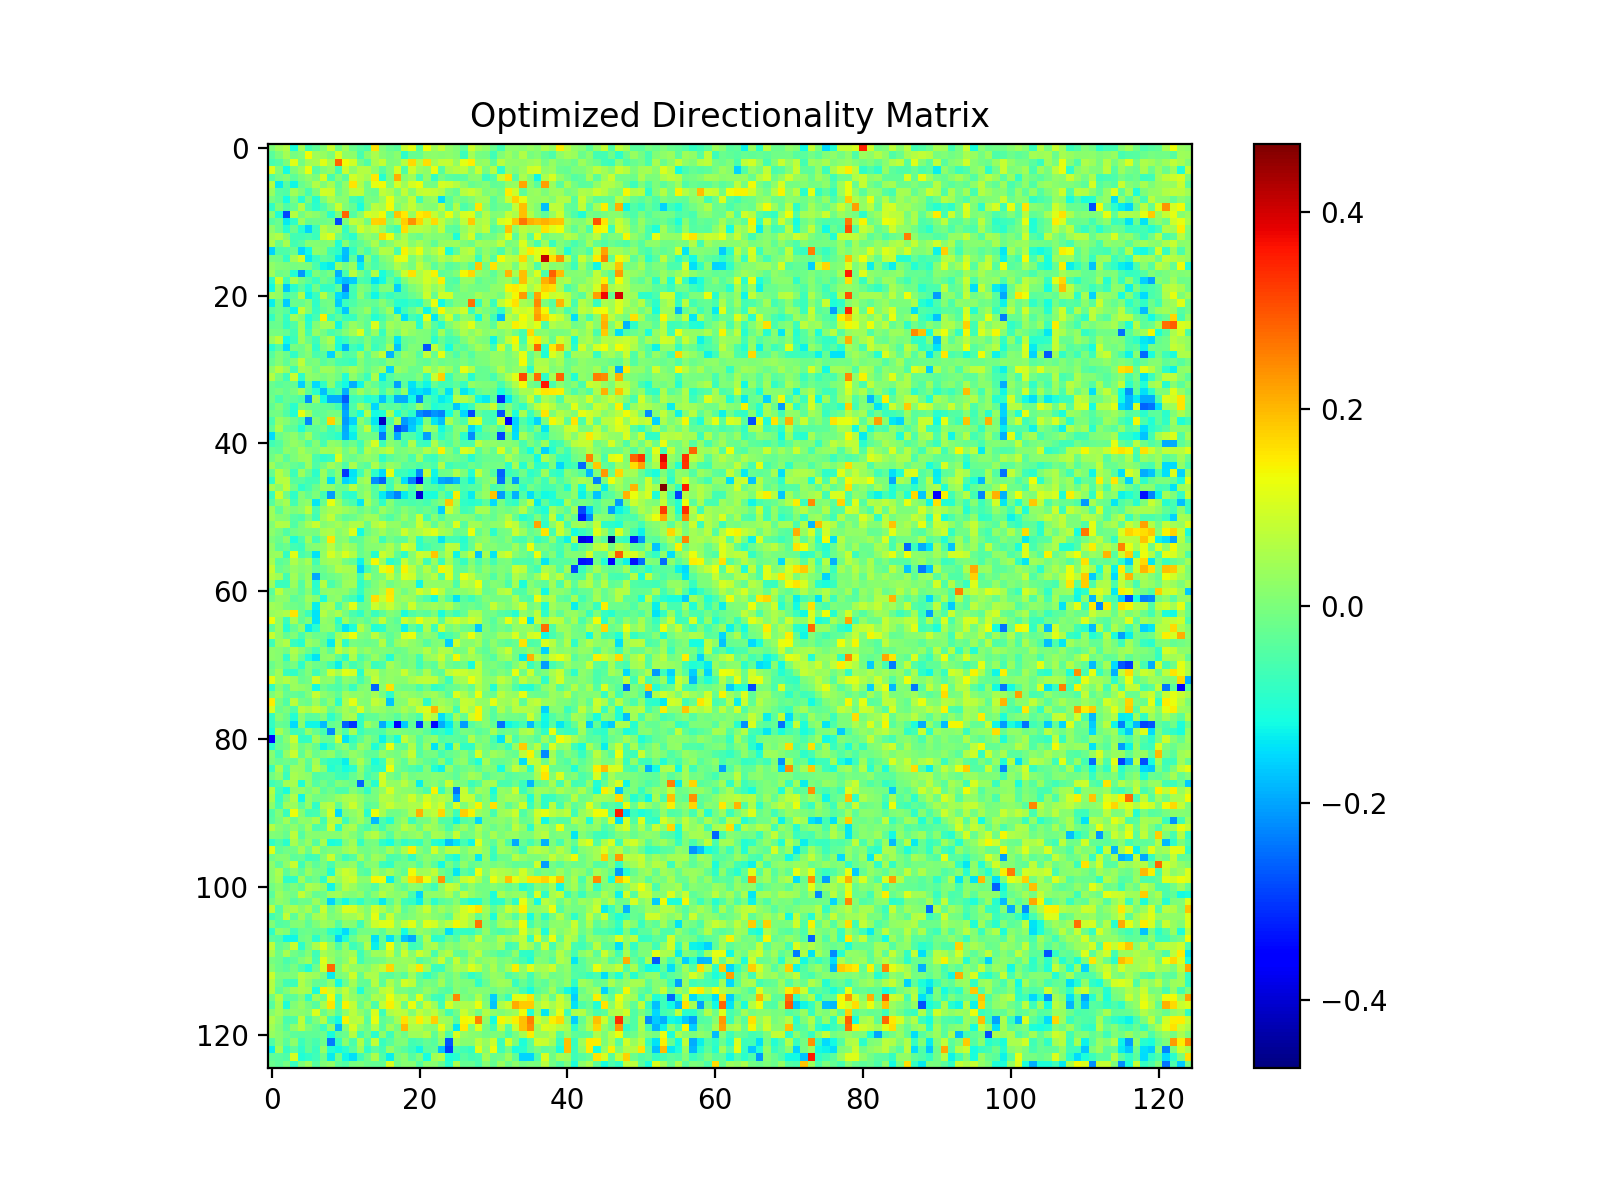

Text(0.5, 1.0, 'Optimized Directionality Matrix')

In [22]:
plt.figure(figsize=(8,6))
plt.imshow(D_opt, cmap="jet")
plt.colorbar()
plt.title("Optimized Directionality Matrix")

In [27]:
# The synfire indicator is 0 either if the spike trains do not contain 
# any coincidences at all or if among all spike 
#trains there is a complete symmetry between leading and following spikes.
F_opt

0.010018361322847271

## Network from Spyke-Sync Matrix 

In [24]:
tresh_spike = np.copy(spike_sync)
tresh_spike[tresh_spike < 0.35] = 0 

NameError: name 'spike_sync' is not defined

In [24]:
np.count_nonzero(tresh_spike)

10176

In [25]:
spike_graph = nx.from_numpy_matrix(tresh_spike)

<IPython.core.display.Javascript object>


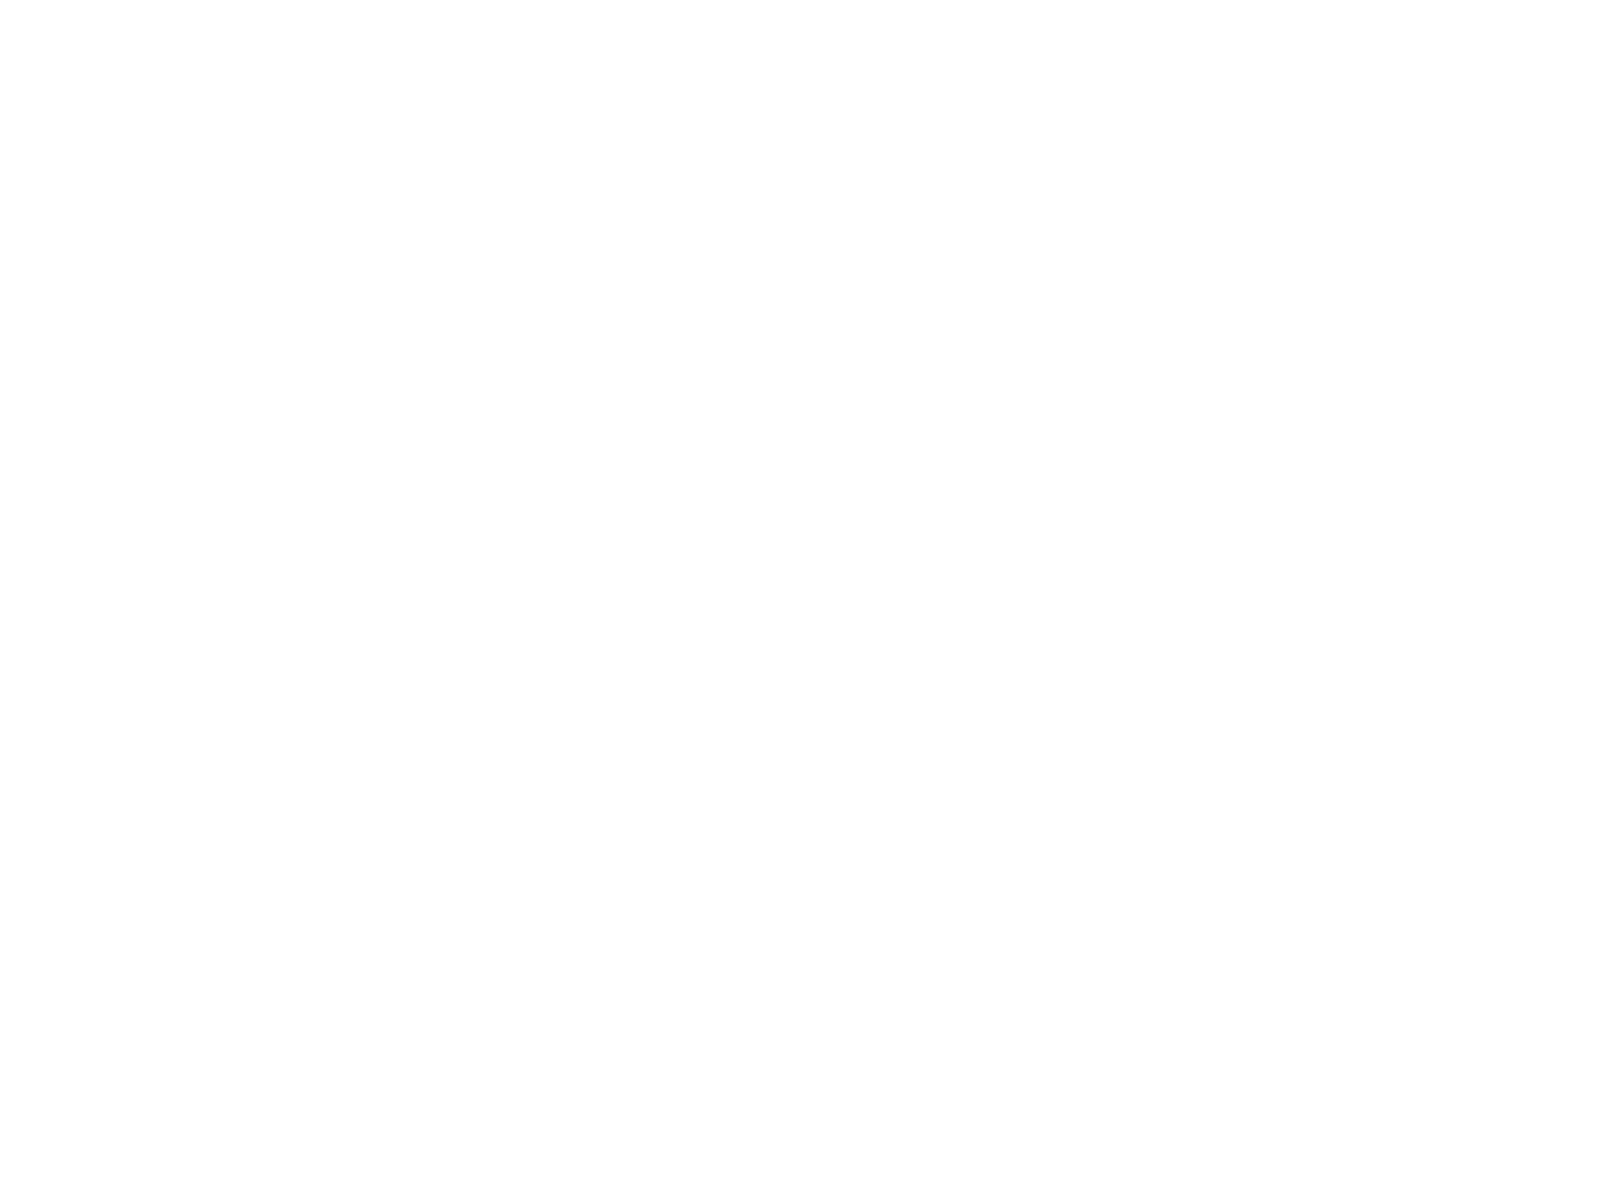

NameError: name 'spike_graph' is not defined

In [335]:
plt.figure(figsize=(8,6))
pos= nx.spring_layout(spike_graph, k = 0.4)

d = nx.degree(spike_graph)

s=nx.draw_networkx_nodes(spike_graph,
            pos,
            node_size= [d[v] * 2 for v in range(len(d))],
            node_color= list(dict(nx.degree(spike_graph)).values()),
            alpha=1,
            cmap=plt.cm.viridis
            )

nx.draw_networkx_edges(spike_graph, pos, alpha=0.1)
nx.draw_networkx_labels(spike_graph, pos, font_size = 10)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)

plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


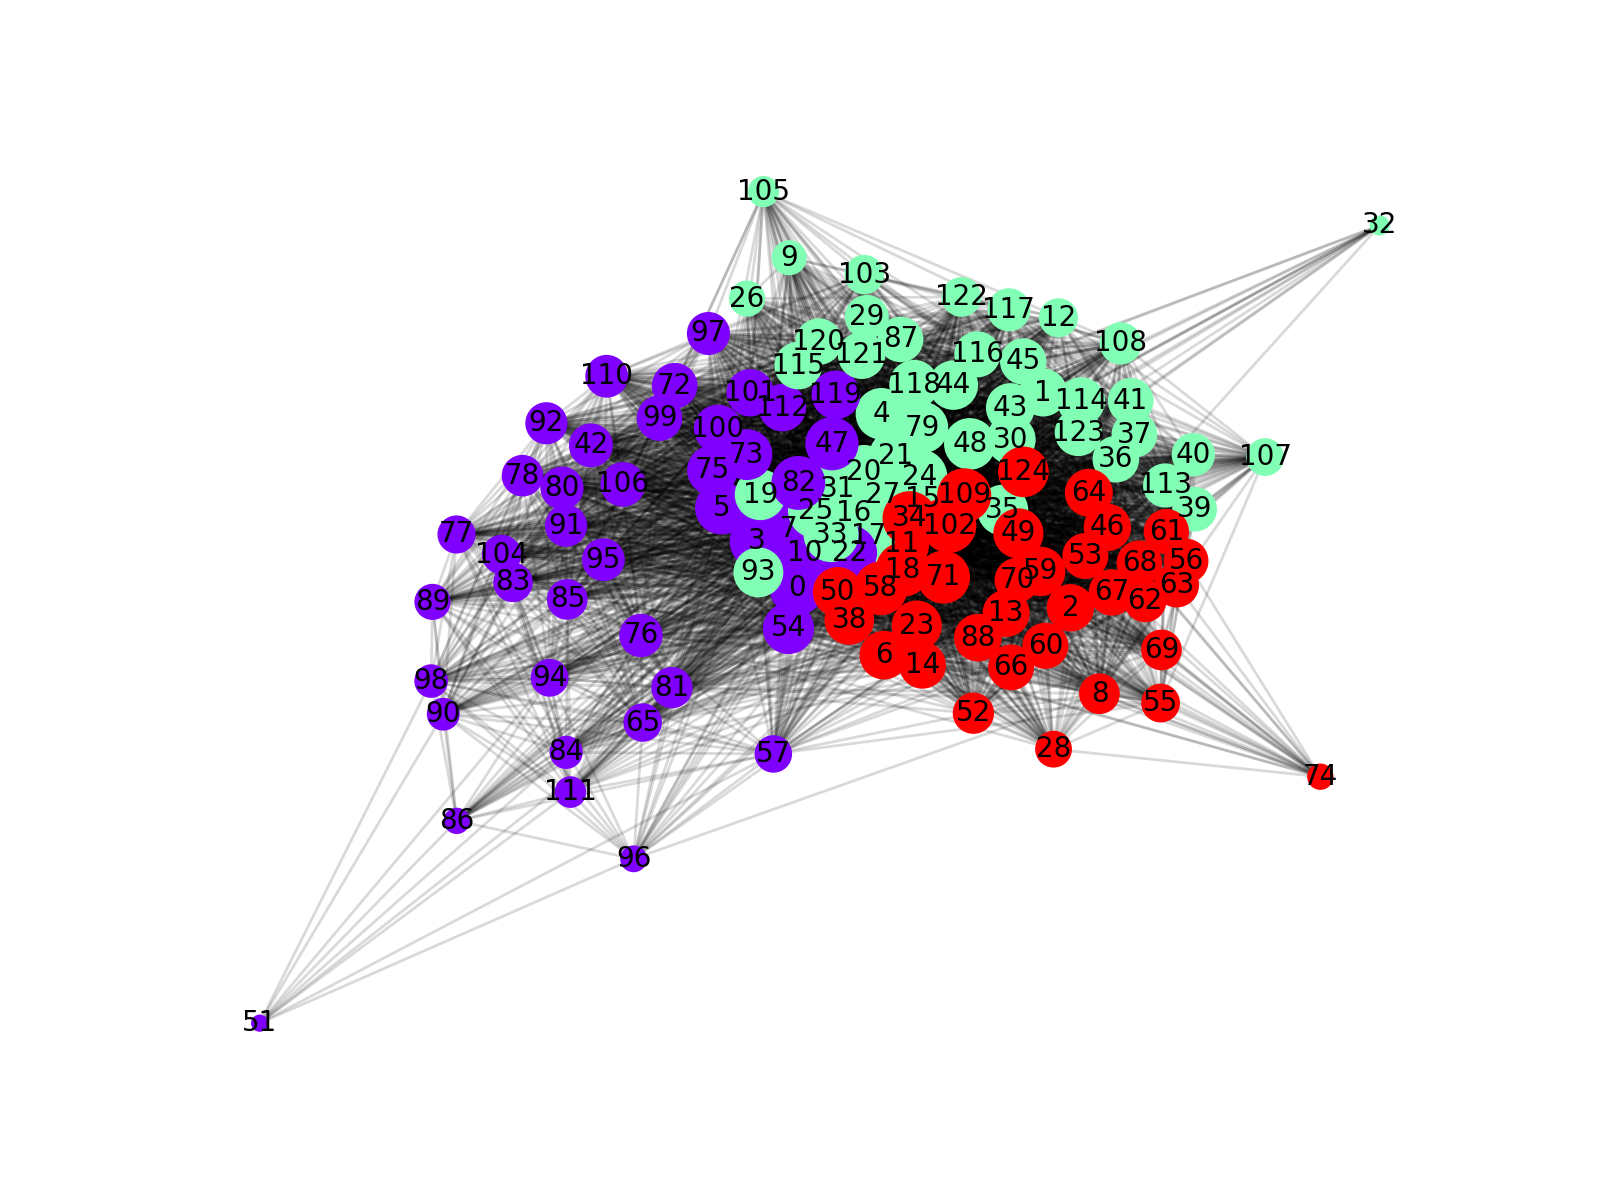

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


In [31]:
part_spike = community.best_partition(spike_graph)

# Values in order to get different colors for communities 
values = [part_spike.get(node) for node in spike_graph.nodes()]


plt.figure(figsize=(8,6))
pos= nx.spring_layout(spike_graph, iterations = 1000, k = 0.4 )

#Getting degree in order to plot nodes with size proportional to degree 
d = nx.degree(spike_graph)

nx.draw_networkx_nodes(spike_graph, pos,
            node_size= [d[v] * 3 for v in range(len(d))] ,
            node_color = values,
            alpha=1,
            cmap = plt.cm.rainbow
             )
nx.draw_networkx_edges(spike_graph,  pos,  alpha=0.15)

nx.draw_networkx_labels(spike_graph, pos, font_size = 10)
plt.axis('off')
plt.show()

In [25]:
index_list0_spike = [i for i, value in enumerate(list(part_spike.values())) if value == 0]
index_list1_spike = [i for i, value in enumerate(list(part_spike.values())) if value == 1]
index_list2_spike = [i for i, value in enumerate(list(part_spike.values())) if value == 2]

NameError: name 'part_spike' is not defined

In [34]:
# Slicing in communities each time series 
slice0_spike = np.take(multi_dim_array1, index_list0_spike)
slice1_spike = np.take(multi_dim_array1, index_list1_spike)
slice2_spike = np.take(multi_dim_array1, index_list2_spike)

<IPython.core.display.Javascript object>


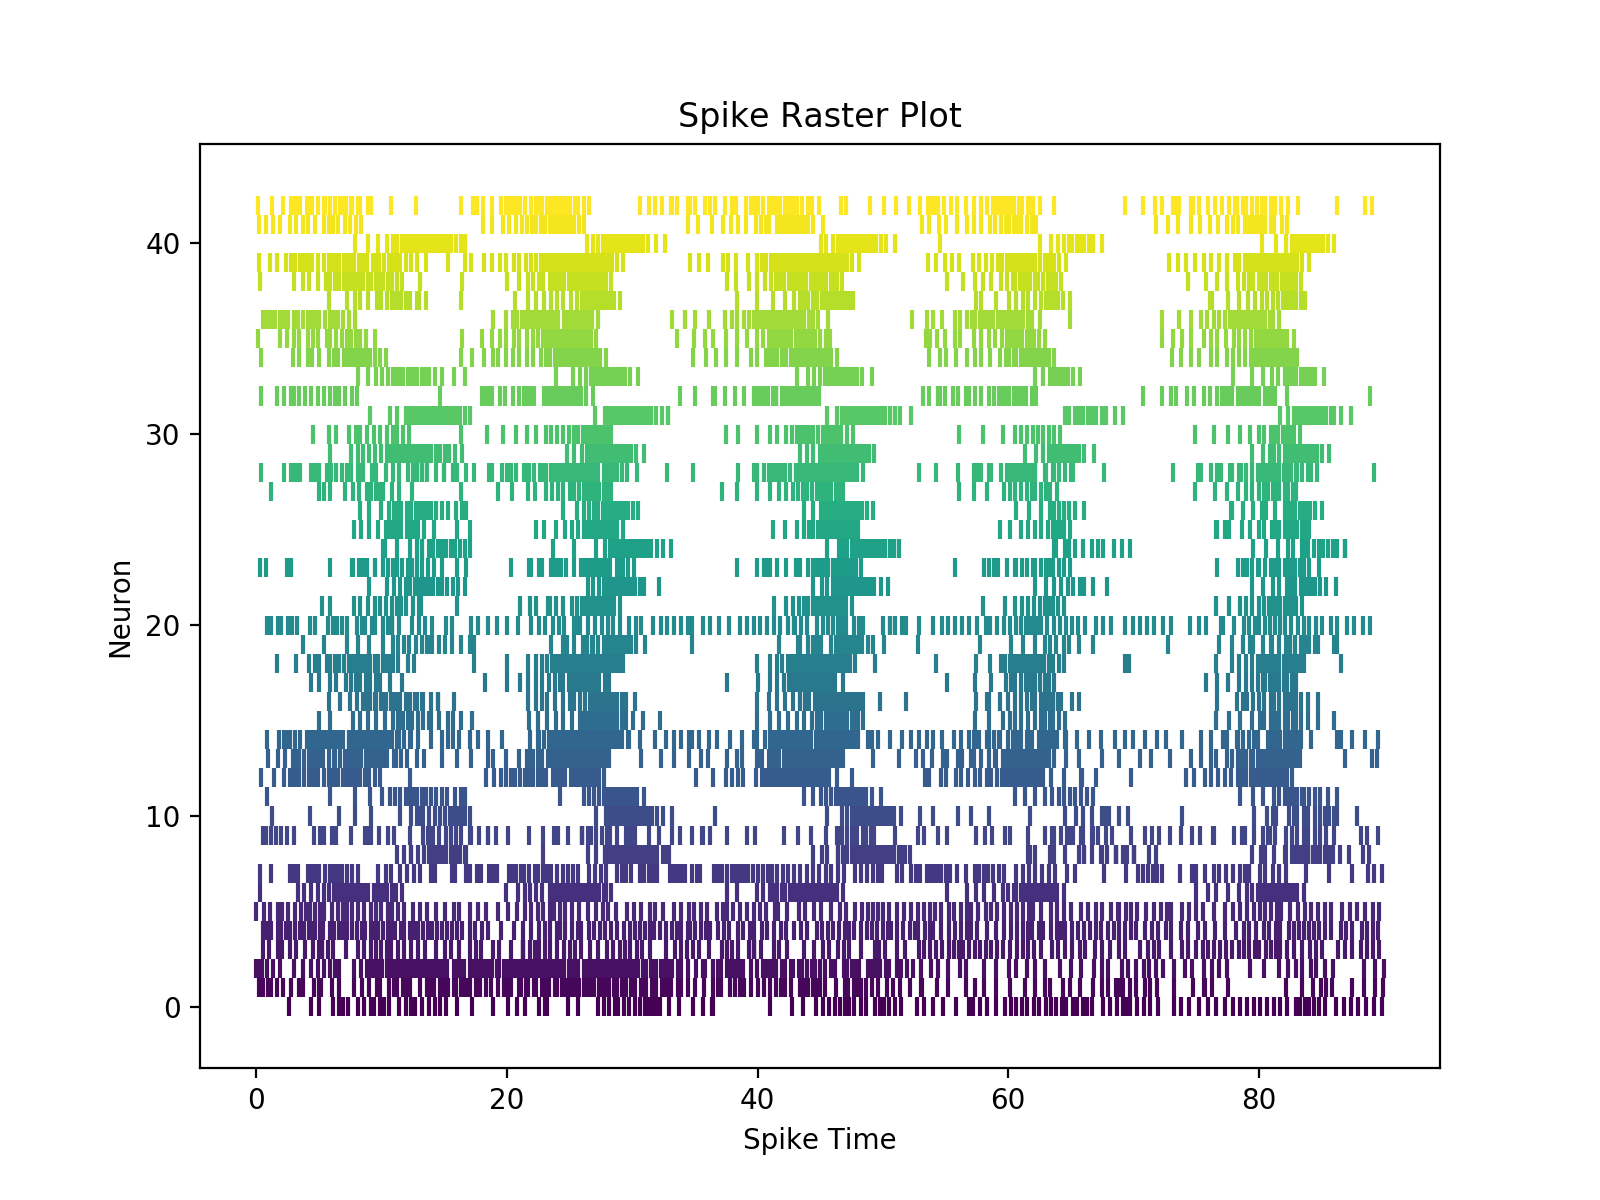

Text(0, 0.5, 'Neuron')

In [35]:
# Plotting Community0 
plt.figure(figsize=(8,6), num = "Raster Spike Sync Community0")
plt.eventplot(slice0_spike , colors= viridis(np.linspace(0, 1, len(slice0_spike))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


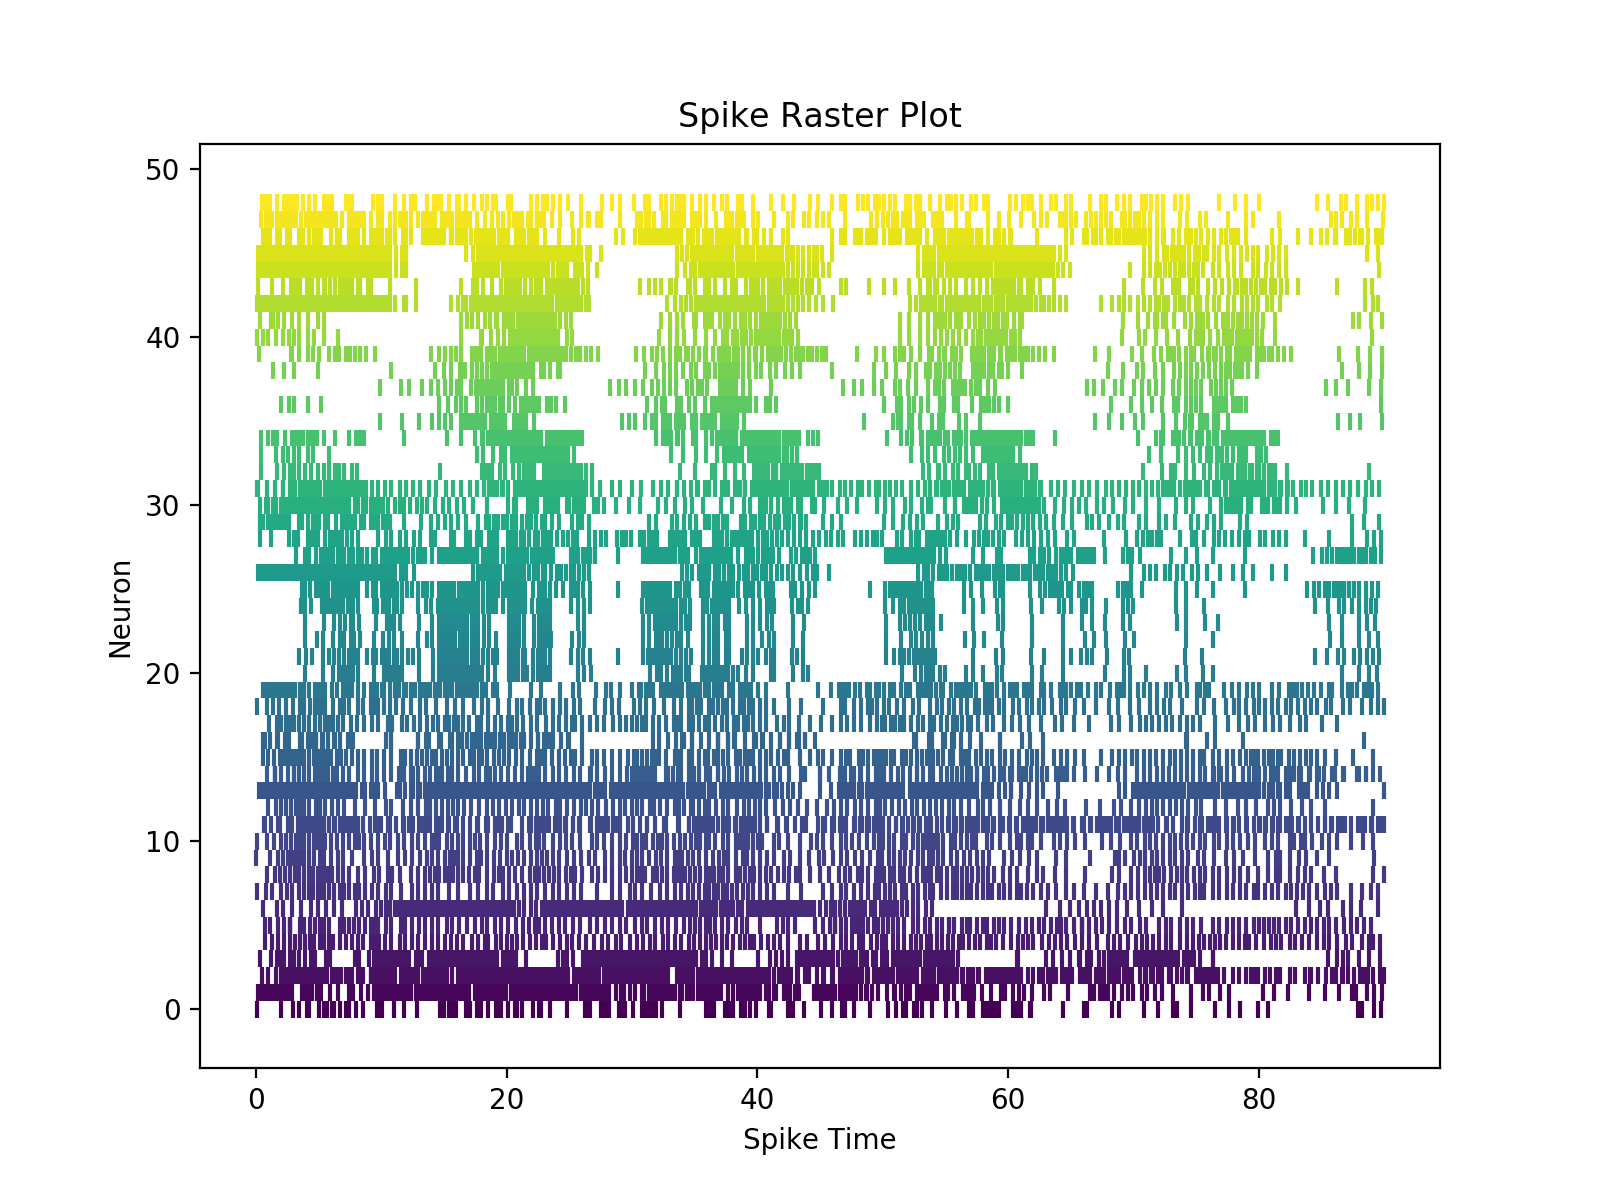

Text(0, 0.5, 'Neuron')

In [154]:
# Plotting Community0 
plt.figure(figsize=(8,6), num = "Raster Spike Sync Community1")
plt.eventplot(slice1_spike , colors= viridis(np.linspace(0, 1, len(slice1_spike))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


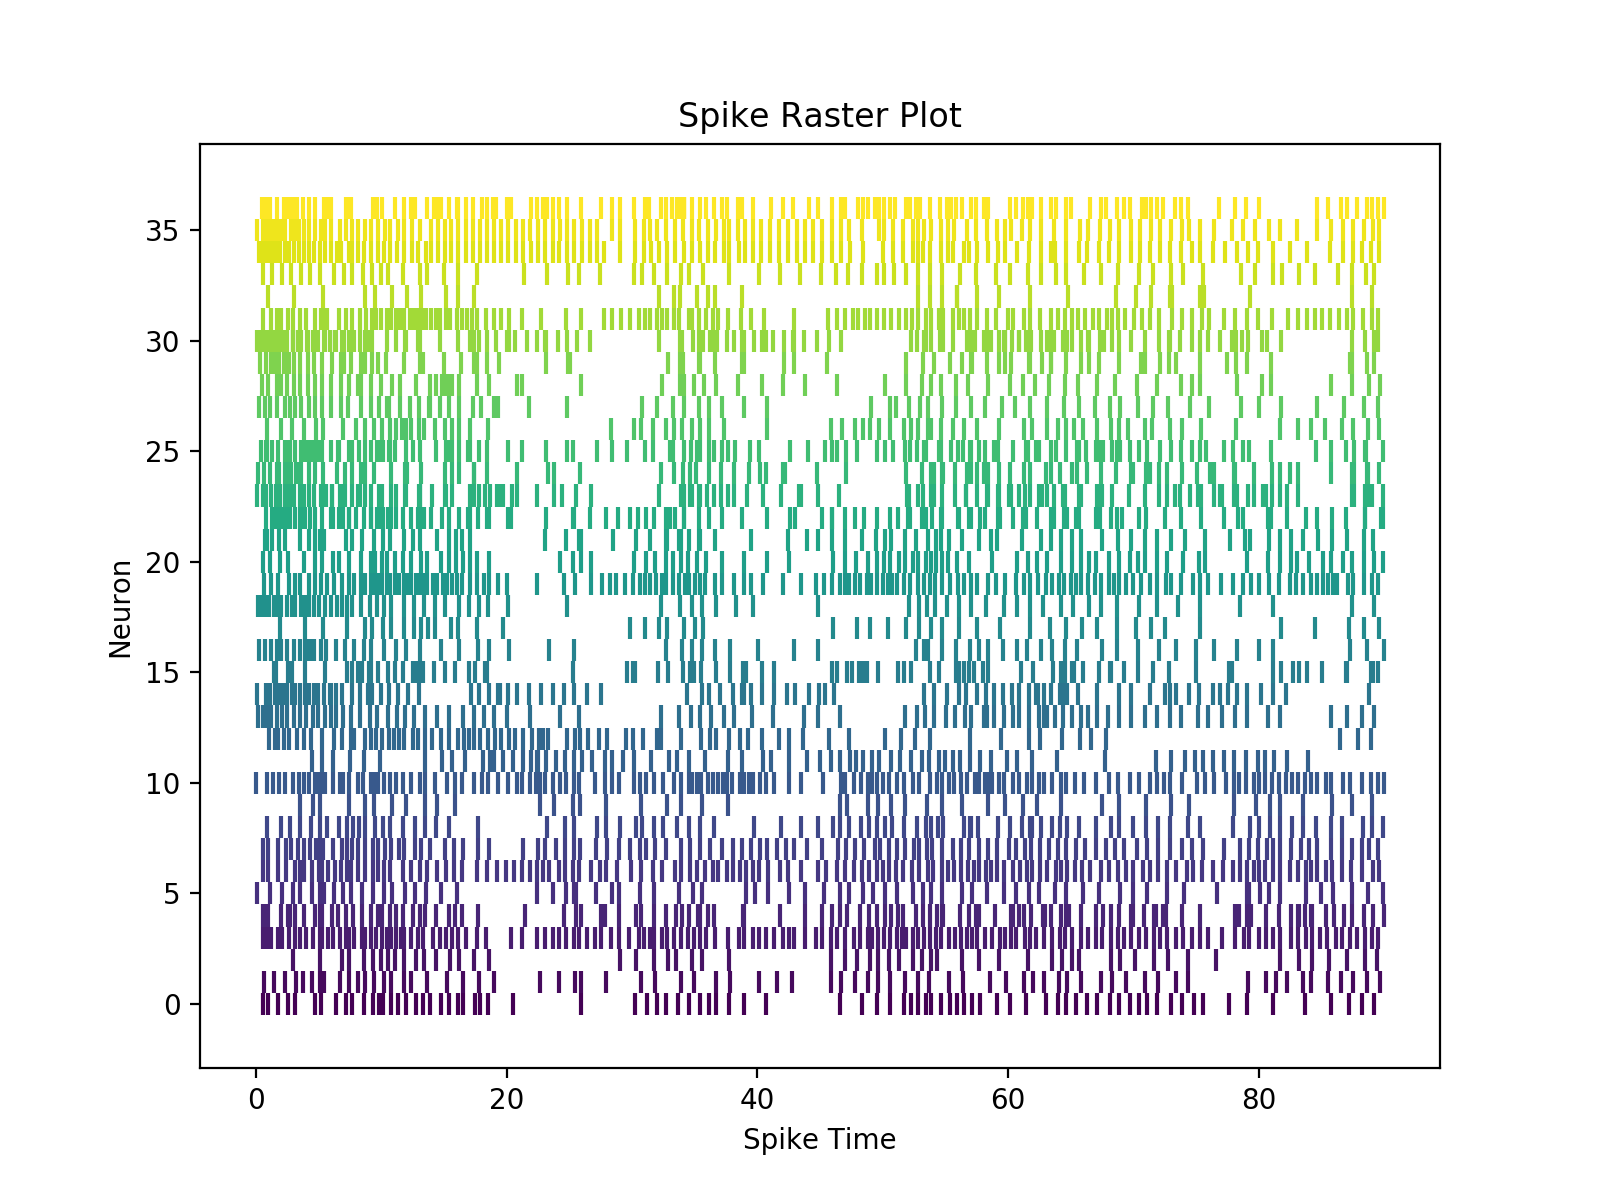

Text(0, 0.5, 'Neuron')

In [36]:
# Plotting Community0 
plt.figure(figsize=(8,6), num = "Raster Spike Sync Community2")
plt.eventplot(slice2_spike , colors= viridis(np.linspace(0, 1, len(slice2_spike))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

## ISI-Distance Network 
ISI = Inter-Spike Interval

In [345]:
# Isi distance is a measure of dissimilarity 
isi_distance = spk.isi_distance_matrix(spike_trains)

In [27]:
isi_similarity  = 1-isi_distance
isi_similarity[isi_similarity < 0.45] = 0 

In [346]:
isi_graph = nx.from_numpy_matrix(isi_similarity)

In [347]:
avg_degree_list = []

for i in range(0,125):
    
    avg_degree_list.append(isi_graph.degree()[i])
    
avg_degree = np.asarray(avg_degree).sum()/125


In [348]:
connected_component_test = avg_degree/np.log(125)
print(connected_component_test)

3.025210140582352e-10


## Motifs 

In [457]:
import itertools
#from tqdm import tqdm_notebook as tqdm 

## We define each S* motif as a directed graph in networkx
motifs = {
    'S1': nx.Graph([(1,2),(1,3),(2,3)])
    'S2': nx.Graph([(1,2),(2,3),(3,4),(4,1)])
    'S3' : nx.Graph([(1,2),(2,3),(3,4),(4,1),(1,3),(4,2)])
    
    }

def mcounter(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = gr.nodes()

    #We use iterools.product to have all combinations of three nodes in the
    #original graph. Then we filter combinations with non-unique nodes, because
    #the motifs do not account for self-consumption.

    triplets = list(itertools.product(*[nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 3]
    triplets = map(list, map(np.sort, triplets))
    u_triplets = []
    [u_triplets.append(trip) for trip in triplets if not u_triplets.count(trip)]

    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs

    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        mot_match = map(lambda mot_id: nx.is_isomorphic(sub_gr, mo[mot_id]), motifs.keys())
        match_keys = [mo.keys()[i] for i in range(len(mo)) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1

    return mcount

In [488]:
motifs = mcounter(isi_graph, motifs)

KeyboardInterrupt: 

In [489]:
nx.triangles(isi_graph)

{0: 1454,
 1: 1606,
 2: 1405,
 3: 1683,
 4: 1111,
 5: 1314,
 6: 1149,
 7: 1721,
 8: 244,
 9: 585,
 10: 1401,
 11: 1709,
 12: 240,
 13: 1590,
 14: 1165,
 15: 1709,
 16: 1498,
 17: 1607,
 18: 1734,
 19: 549,
 20: 1725,
 21: 1528,
 22: 1724,
 23: 1484,
 24: 1655,
 25: 1703,
 26: 991,
 27: 1690,
 28: 199,
 29: 257,
 30: 1465,
 31: 1456,
 32: 142,
 33: 1711,
 34: 1810,
 35: 1201,
 36: 123,
 37: 128,
 38: 944,
 39: 281,
 40: 179,
 41: 127,
 42: 183,
 43: 690,
 44: 311,
 45: 375,
 46: 195,
 47: 1729,
 48: 1861,
 49: 1483,
 50: 1274,
 51: 33,
 52: 672,
 53: 586,
 54: 1574,
 55: 186,
 56: 447,
 57: 29,
 58: 1602,
 59: 1577,
 60: 1400,
 61: 1597,
 62: 1607,
 63: 1264,
 64: 1681,
 65: 98,
 66: 833,
 67: 841,
 68: 656,
 69: 525,
 70: 1705,
 71: 1660,
 72: 252,
 73: 1481,
 74: 36,
 75: 1528,
 76: 122,
 77: 132,
 78: 162,
 79: 1628,
 80: 117,
 81: 94,
 82: 1658,
 83: 131,
 84: 71,
 85: 135,
 86: 40,
 87: 1076,
 88: 1279,
 89: 126,
 90: 92,
 91: 148,
 92: 305,
 93: 1719,
 94: 92,
 95: 185,
 96: 40,
 

### Finding Similarity between nodes 

In [384]:
bunch_tuples = []
x = np.array(range(0,125))
for i in range(0,125):
    bunch_tuples.append([(x[i], k) for k in range(0,125)])

In [438]:
jaccard_similarity = nx.jaccard_coefficient(isi_graph, ebunch=bunch_tuples[0])

In [439]:
sim = []
for u, v, p in jaccard_similarity:
    #jacc_sim_node0.append(u,v,p)
    #print('(%d, %d) -> %.8f' % (u, v, p))
    sim.append(p)
    

In [313]:
# https://en.wikipedia.org/wiki/SimRank 
# 

def simrank(G, r=0.7, max_iter=100):
    from collections import defaultdict
    import copy
      # init. vars
    sim_old = defaultdict(list)
    sim = defaultdict(list)
    for n in G.nodes():
        sim[n] = defaultdict(int)
        sim[n][n] = 1
        sim_old[n] = defaultdict(int)
        sim_old[n][n] = 0

    # recursively calculate simrank
    for iter_ctr in range(max_iter):
        if _is_converge(sim, sim_old):
            break
        sim_old = copy.deepcopy(sim)
        for u in G.nodes():
            for v in G.nodes():
                if u == v:
                    continue
                s_uv = 0.0
                for n_u in G.neighbors(u):
                    for n_v in G.neighbors(v):
                        s_uv += sim_old[n_u][n_v]
                sim[u][v] = (r * s_uv / (len(list(G.neighbors(u))) * len(list(G.neighbors(v)))))
    return sim

def _is_converge(s1, s2, eps=1e-4):
    for i in s1.keys():
        for j in s1[i].keys():
            if abs(s1[i][j] - s2[i][j]) >= eps:
                return False
    return True

In [314]:
simrank(isi_graph)

defaultdict(list,
            {0: defaultdict(int,
                         {0: 1,
                          1: 0.0897055402194352,
                          2: 0.08933566066923206,
                          3: 0.09129311182530779,
                          4: 0.09207678167989047,
                          5: 0.09246485659957958,
                          6: 0.08977475887215326,
                          7: 0.09153763352218709,
                          8: 0.08414294742717805,
                          9: 0.09276974236255707,
                          10: 0.09116663575081772,
                          11: 0.09171850200511616,
                          12: 0.0919590608549309,
                          13: 0.0914179527528861,
                          14: 0.08941513363526994,
                          15: 0.09161024470320085,
                          16: 0.0909935773035918,
                          17: 0.09133178276229596,
                          18: 0.09105045685121486,
            

In [29]:
np.count_nonzero(isi_similarity)

5447

<IPython.core.display.Javascript object>


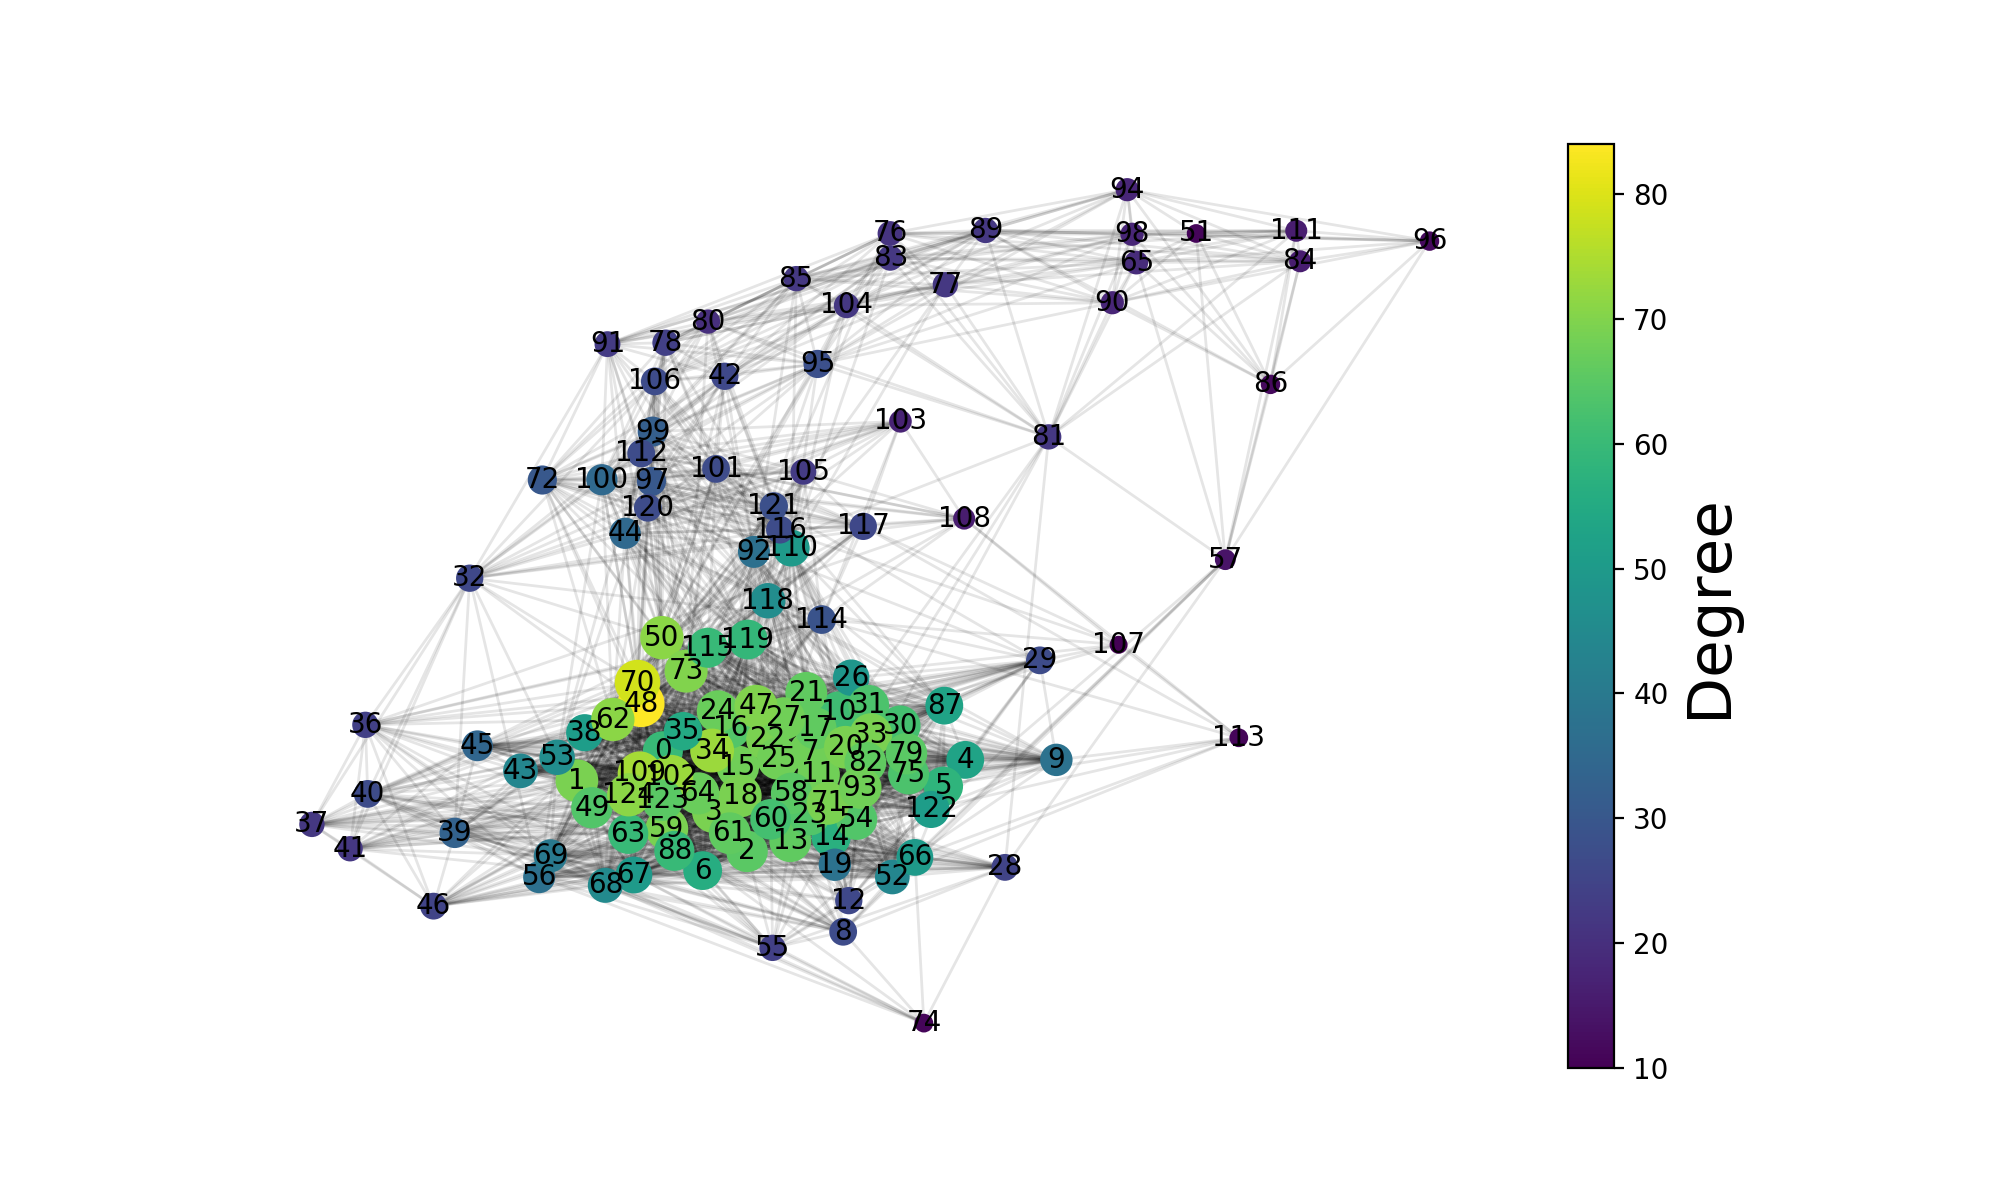

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


In [408]:
plt.figure(figsize=(10,6))
pos= nx.spring_layout(isi_graph, k = 0.4)


d = nx.degree(isi_graph)

s=nx.draw_networkx_nodes(isi_graph,
            pos,
            node_size= [d[v] * 3 for v in range(len(d))],
            node_color=list(dict(nx.degree(isi_graph)).values()),
            alpha=1,
            cmap=plt.cm.viridis
            )

nx.draw_networkx_edges(isi_graph, pos, alpha=0.1)
nx.draw_networkx_labels(isi_graph, pos, font_size = 10)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)

plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


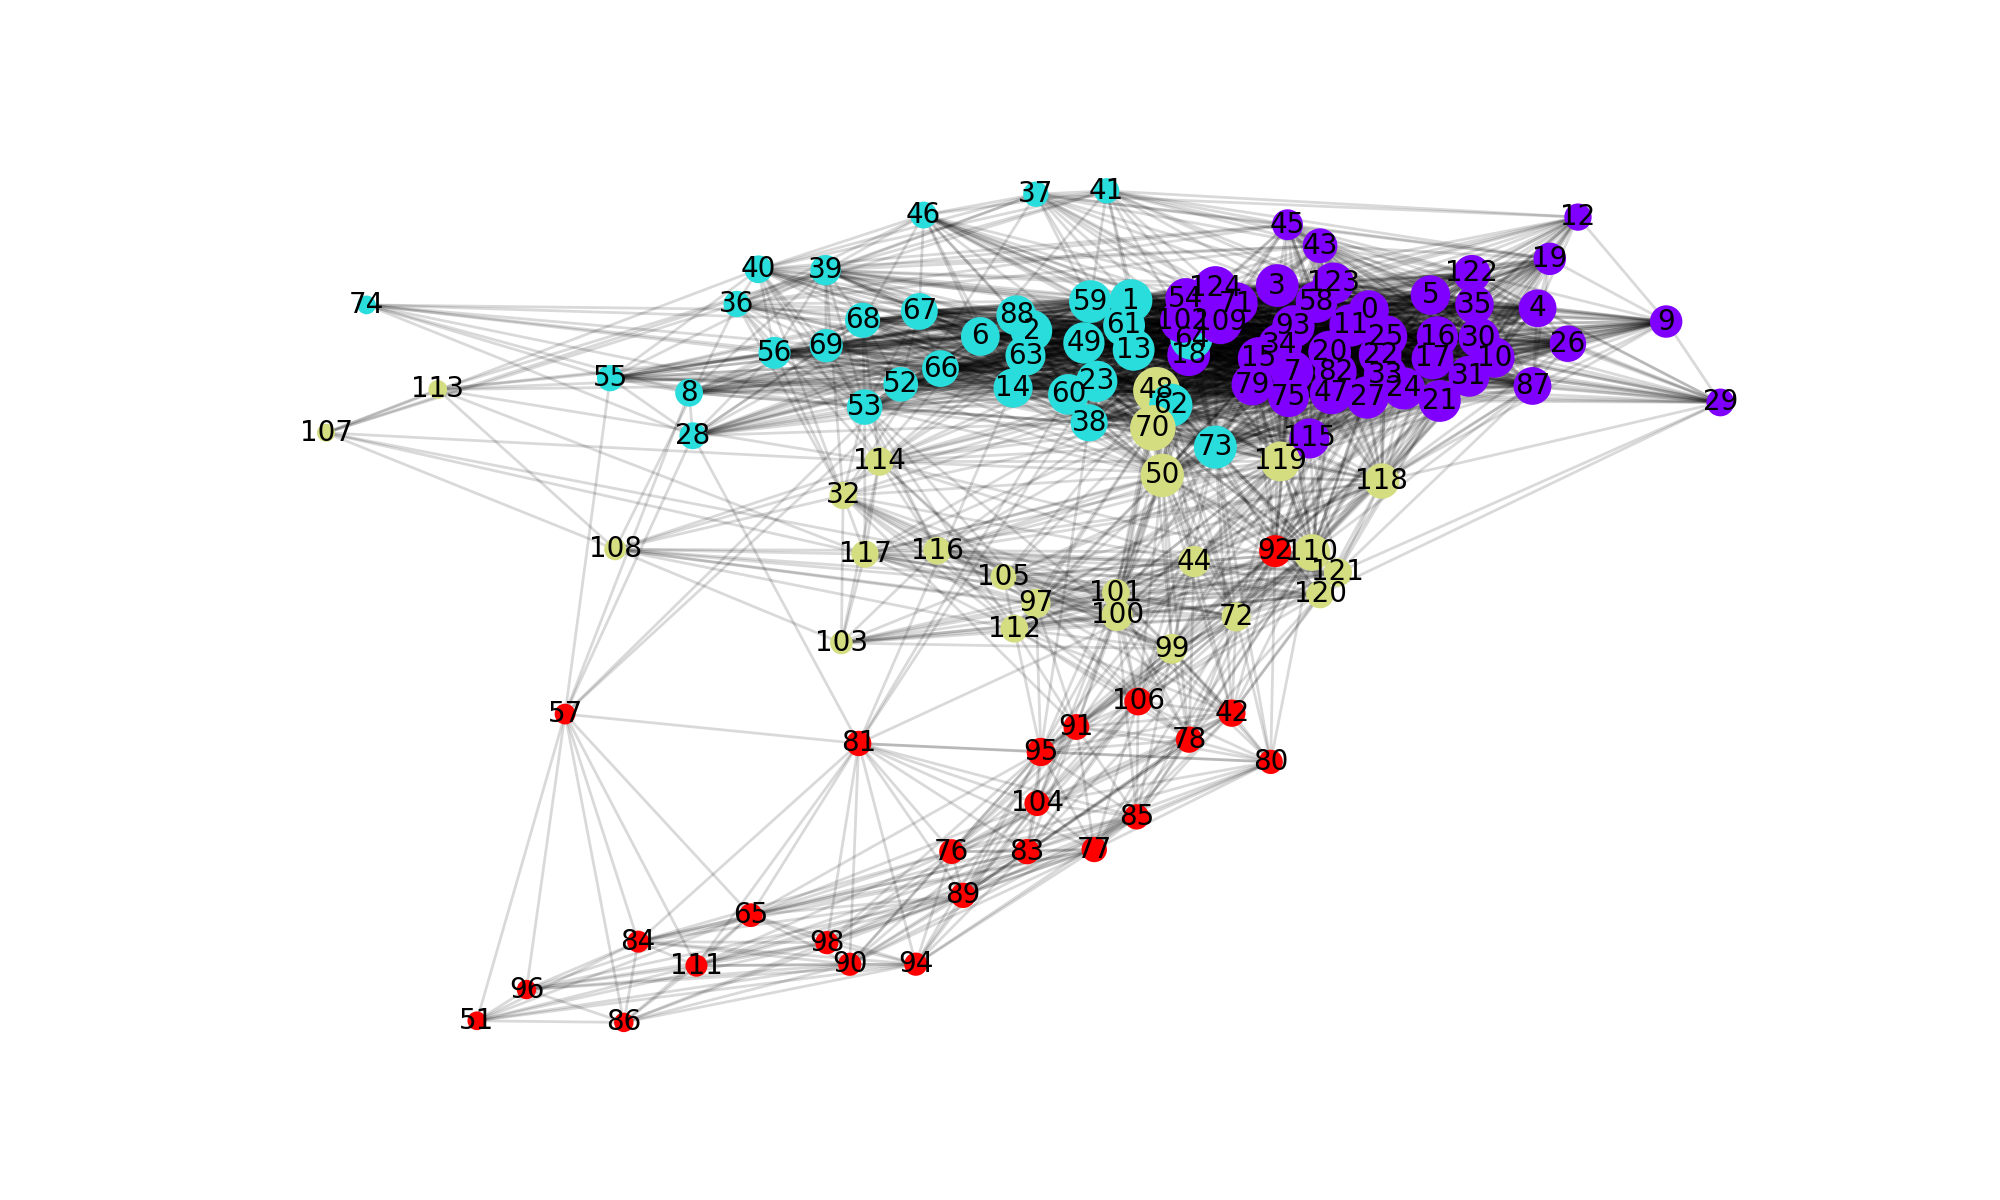

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


In [409]:
part = community.best_partition(isi_graph)

# Values in order to get different colors for communities 
values = [part.get(node) for node in isi_graph.nodes()]


plt.figure(figsize=(10,6))
pos= nx.spring_layout(isi_graph, iterations = 1000, k = 0.4 )

#Getting degree in order to plot nodes with size proportional to degree 
d = nx.degree(isi_graph)

nx.draw_networkx_nodes(isi_graph, pos,
            node_size= [d[v] * 3 for v in range(len(d))] ,
            node_color = values,
            alpha=1,
            cmap = plt.cm.rainbow
             )
nx.draw_networkx_edges(isi_graph,  pos,  alpha=0.15)

nx.draw_networkx_labels(isi_graph, pos, font_size = 10)
plt.axis('off')
plt.show()

In [32]:
# Get indices of each node in a defined community (4 coms were detected)
index_list0 = [i for i, value in enumerate(list(part.values())) if value == 0]
index_list1 = [i for i, value in enumerate(list(part.values())) if value == 1]
index_list2 = [i for i, value in enumerate(list(part.values())) if value == 2]
index_list3 = [i for i, value in enumerate(list(part.values())) if value == 3]

In [33]:
# Slicing in communities each time series 
slice0 = np.take(multi_dim_array1, index_list0)
slice1 = np.take(multi_dim_array1, index_list1)
slice2 = np.take(multi_dim_array1, index_list2)
slice3 = np.take(multi_dim_array1, index_list3)

In [34]:
# Getting the complete matrix but ordered by community 
coms_multi_dim_array1 = np.concatenate((slice0, slice1, slice2, slice3))

<IPython.core.display.Javascript object>


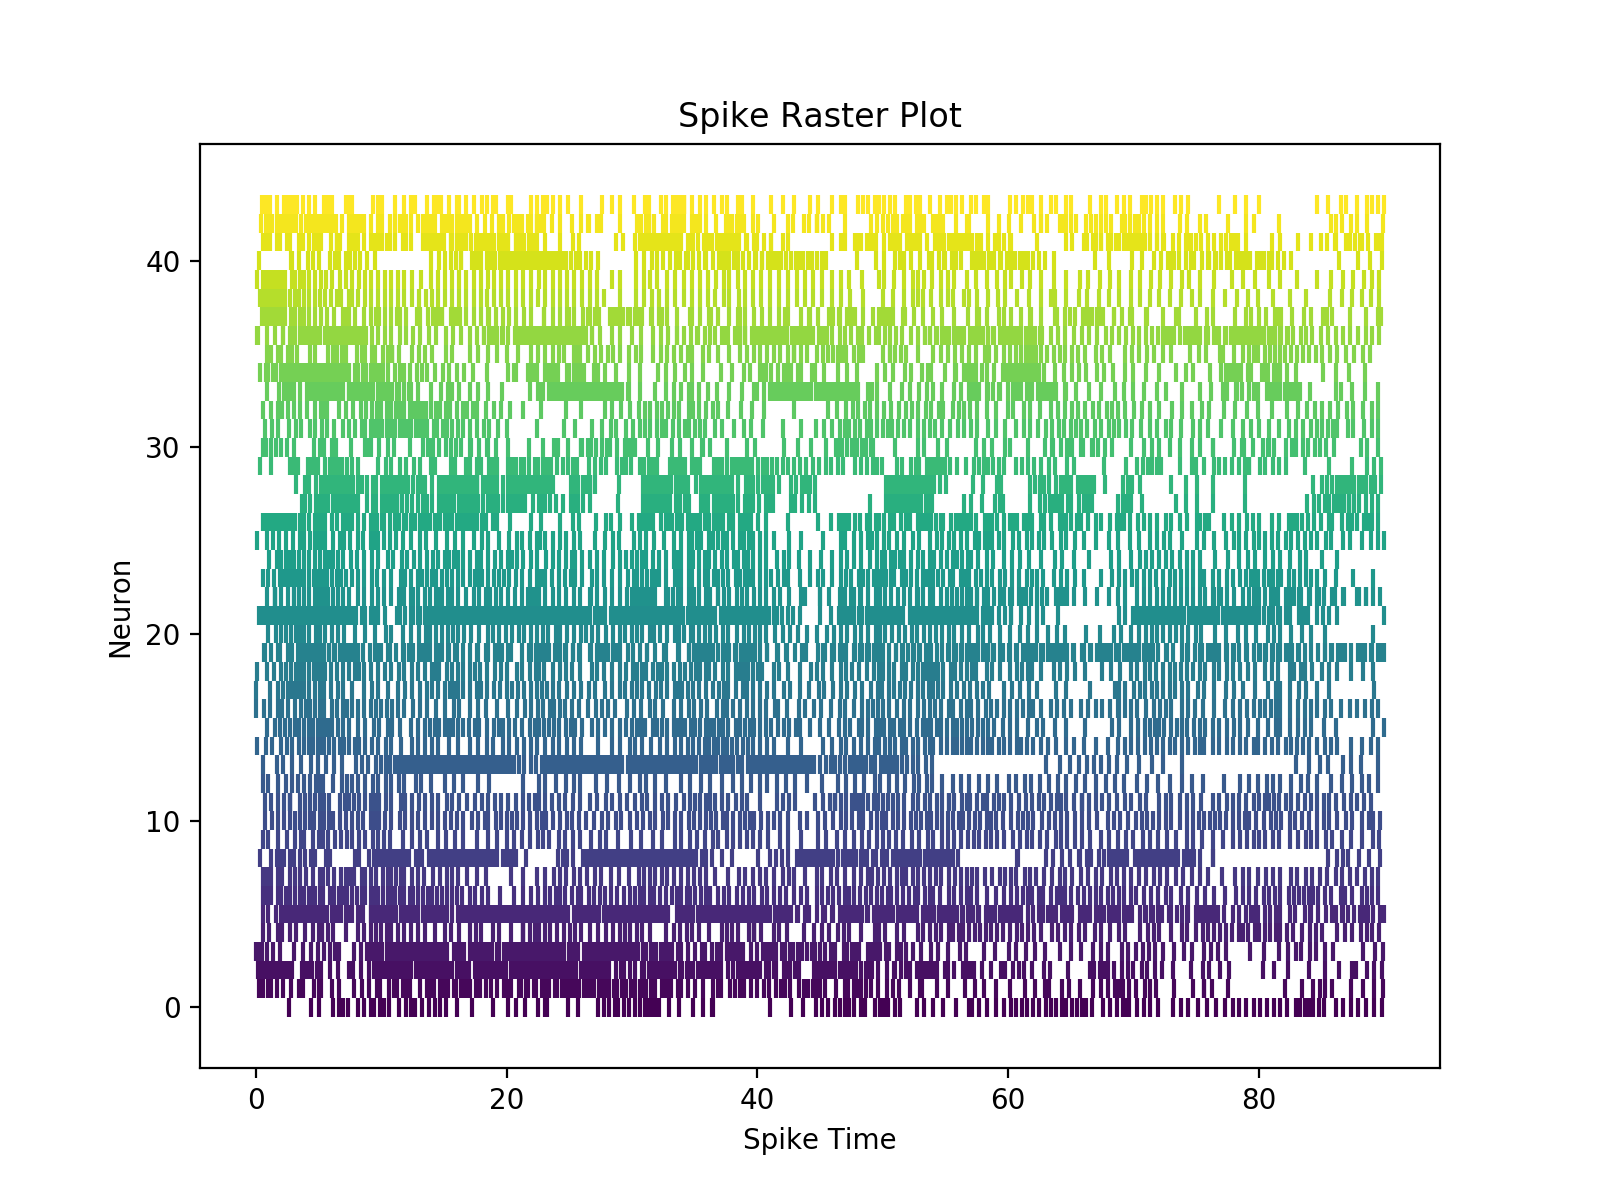

Text(0, 0.5, 'Neuron')

In [35]:
# Plotting Community0 
plt.figure(figsize=(8,6), num = "Raster Community0")
plt.eventplot(slice0 , colors= viridis(np.linspace(0, 1, len(slice0))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


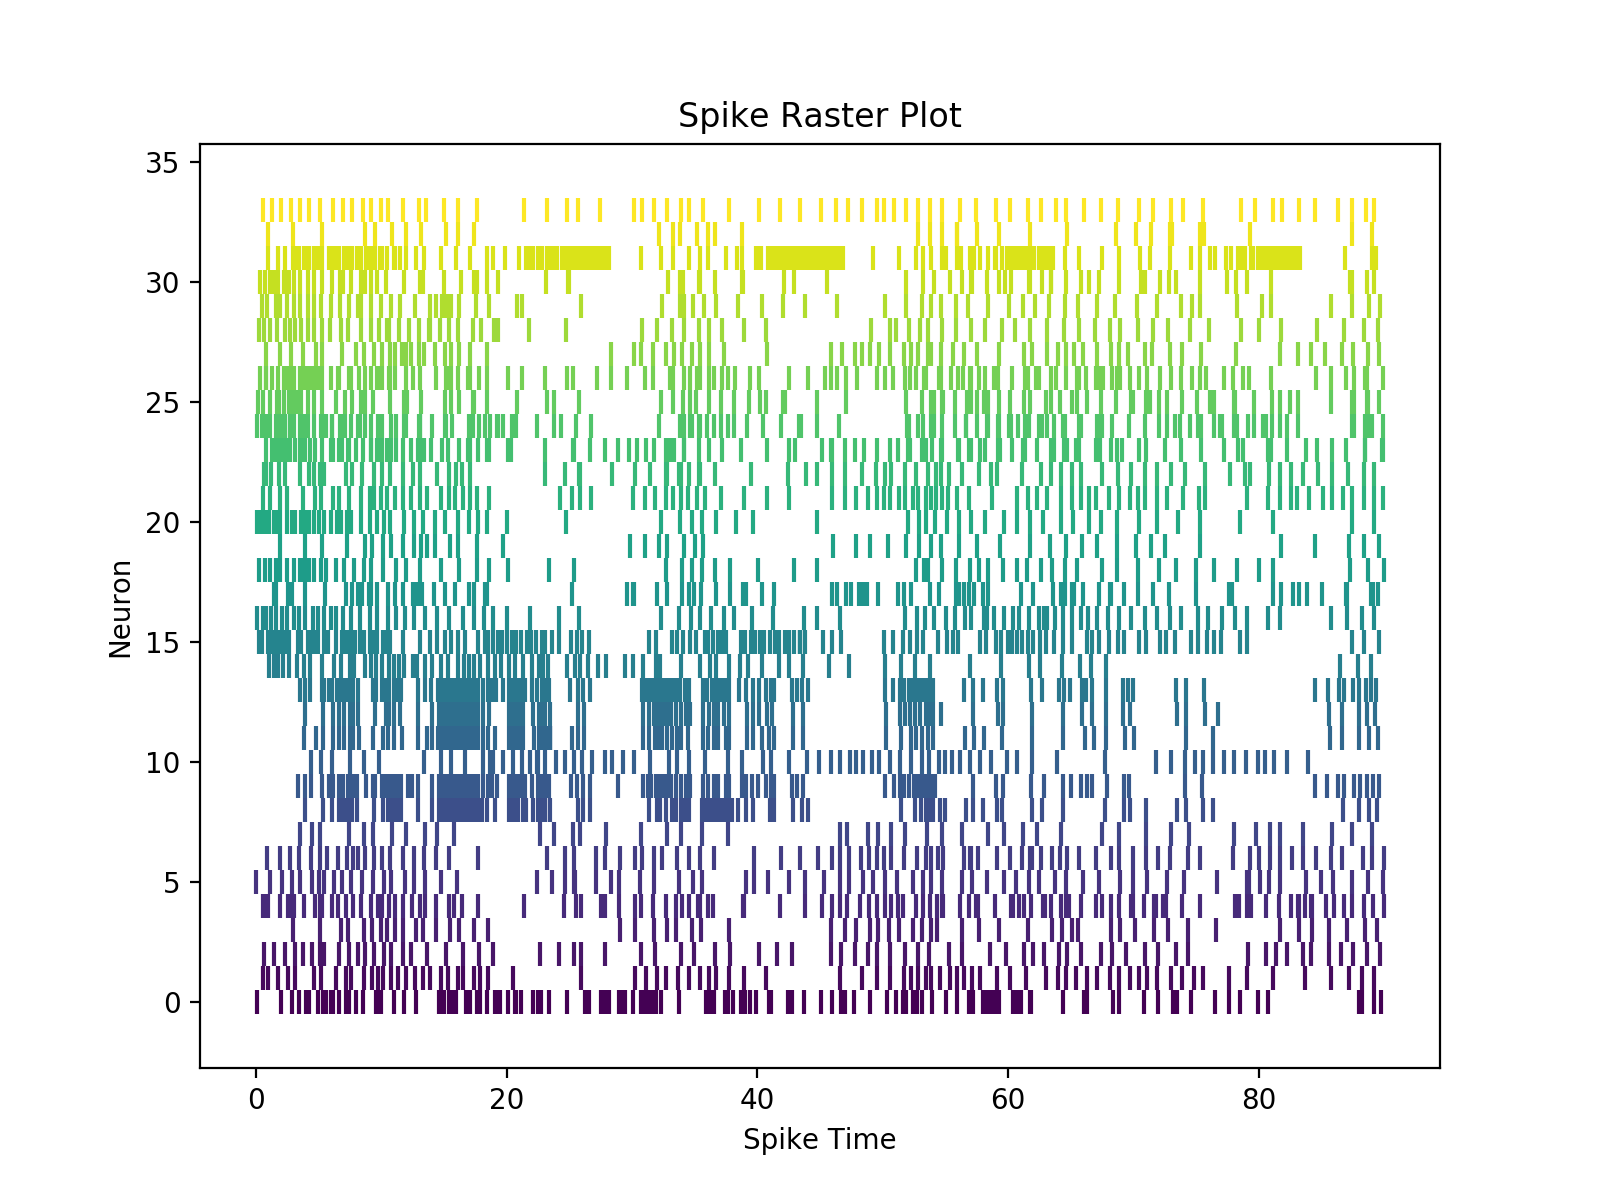

Text(0, 0.5, 'Neuron')

In [165]:
#Plotting Community1 
plt.figure(figsize=(8,6), num = "Raster Community1")
plt.eventplot(slice1 , colors= viridis(np.linspace(0, 1, len(slice1))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


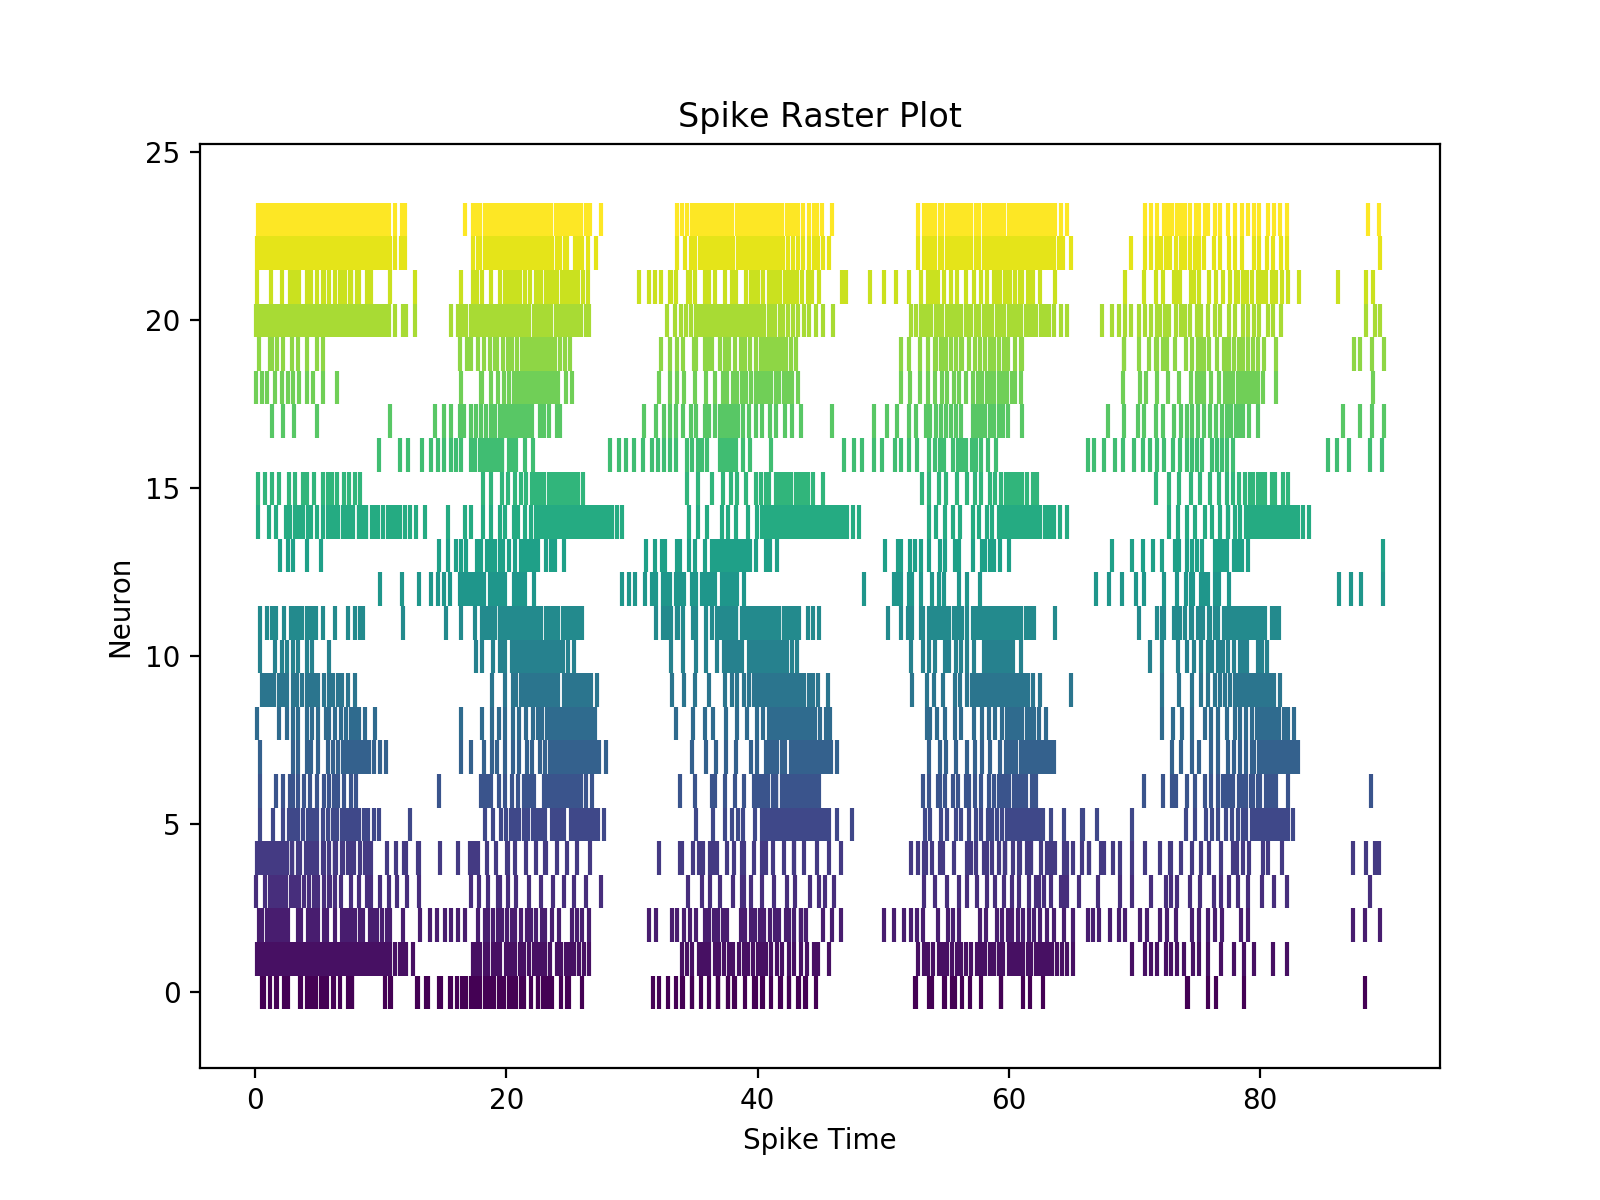

Text(0, 0.5, 'Neuron')

In [36]:
#Plotting Community2
plt.figure(figsize=(8,6), num = "Raster Community2")
plt.eventplot(slice2 , colors= viridis(np.linspace(0, 1, len(slice2))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


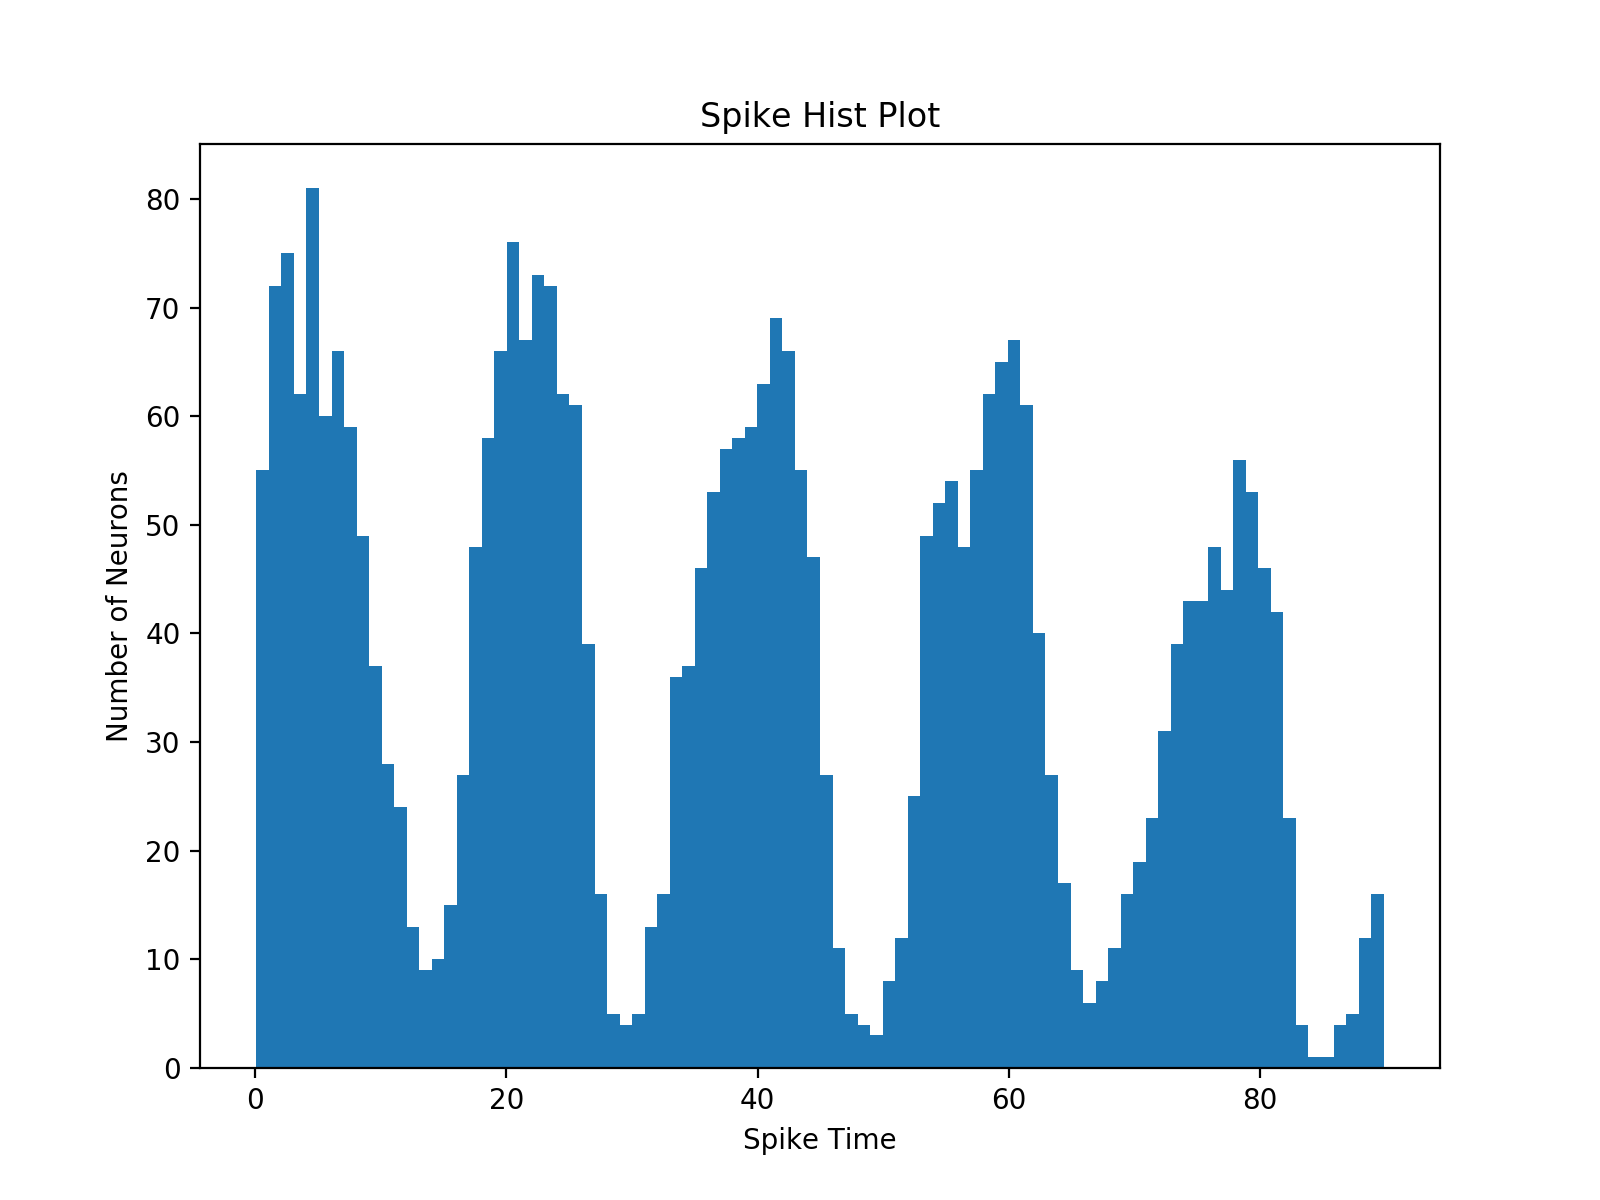

Text(0, 0.5, 'Number of Neurons')

In [346]:
# Histogram 
merged_slice2_list = list(itertools.chain(*list(slice2)))
merged_slice2_array = np.asarray(merged_slice2_list)

plt.figure(figsize=(8,6), num='Histogram Community2')
plt.hist(merged_slice2_array, bins= 90 )
plt.title("Spike Hist Plot")
plt.xlabel("Spike Time")
plt.ylabel("Number of Neurons")

<IPython.core.display.Javascript object>


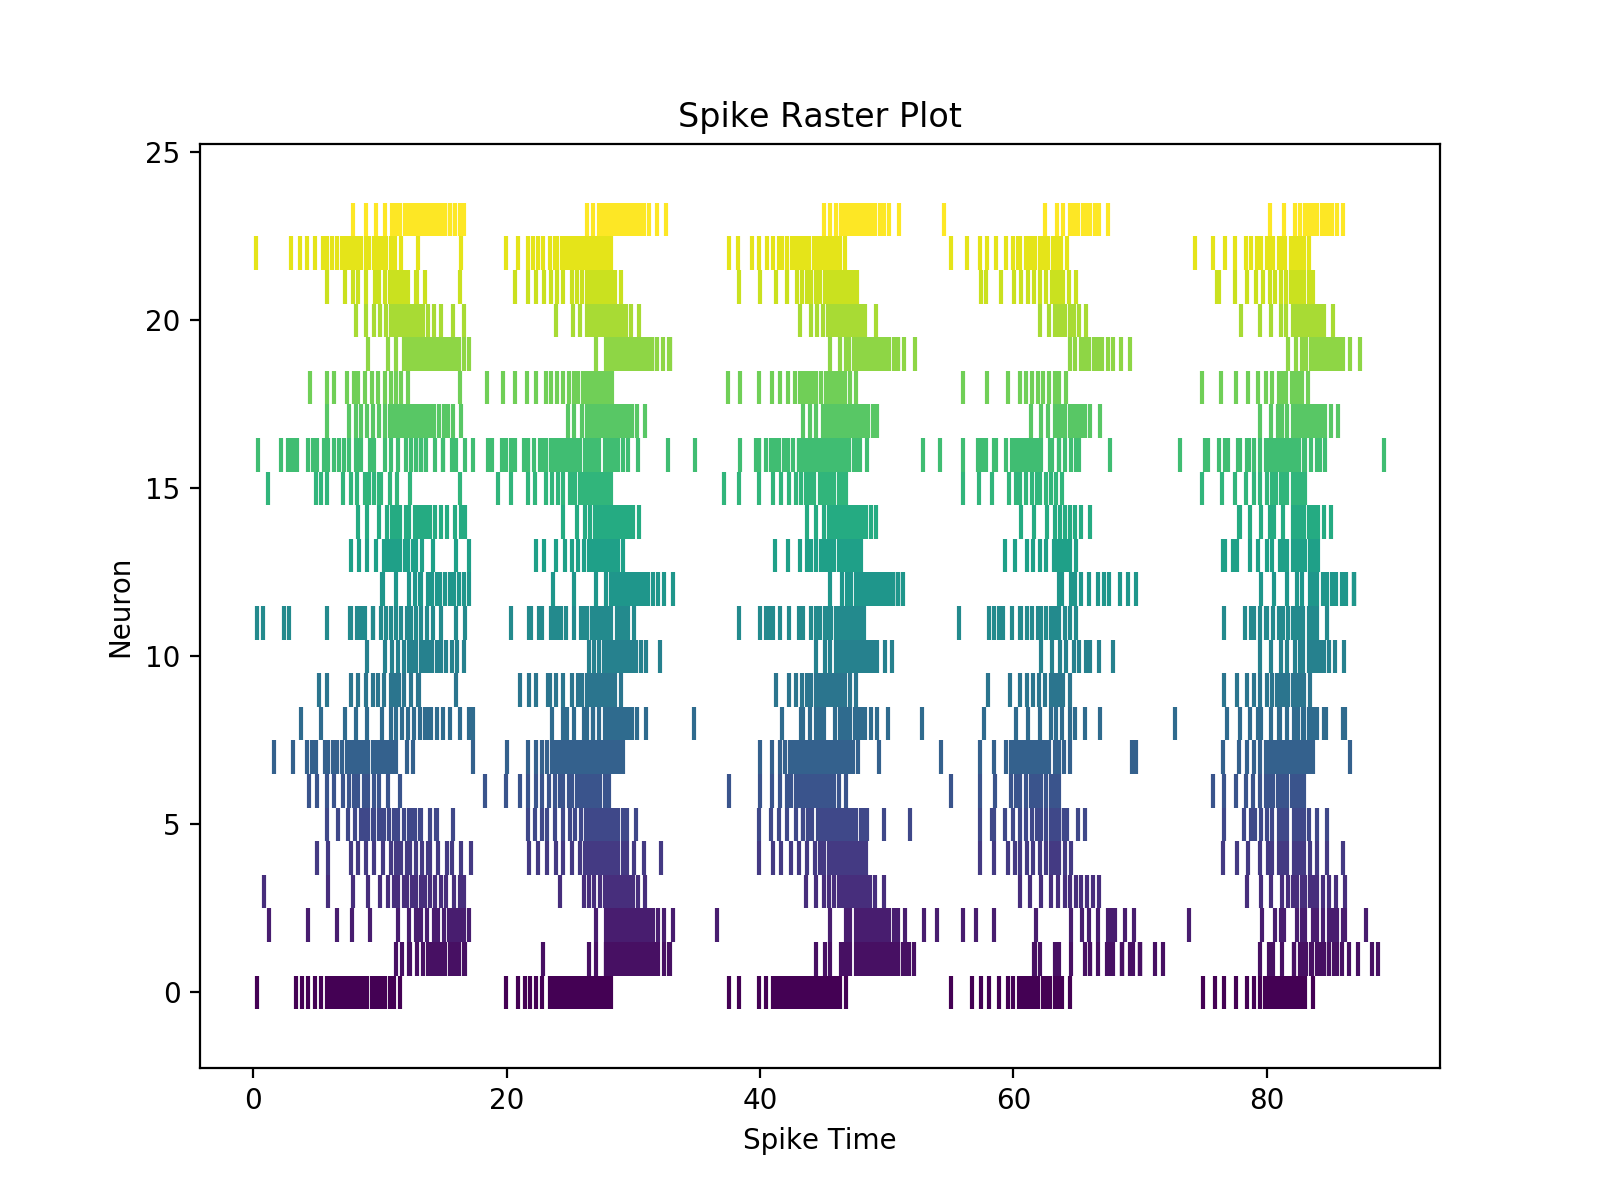

Text(0, 0.5, 'Neuron')

In [37]:
#Plotting Community3 
plt.figure(figsize=(8,6), num = "Raster Community3")
plt.eventplot(slice3 , colors= viridis(np.linspace(0, 1, len(slice3))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

<IPython.core.display.Javascript object>


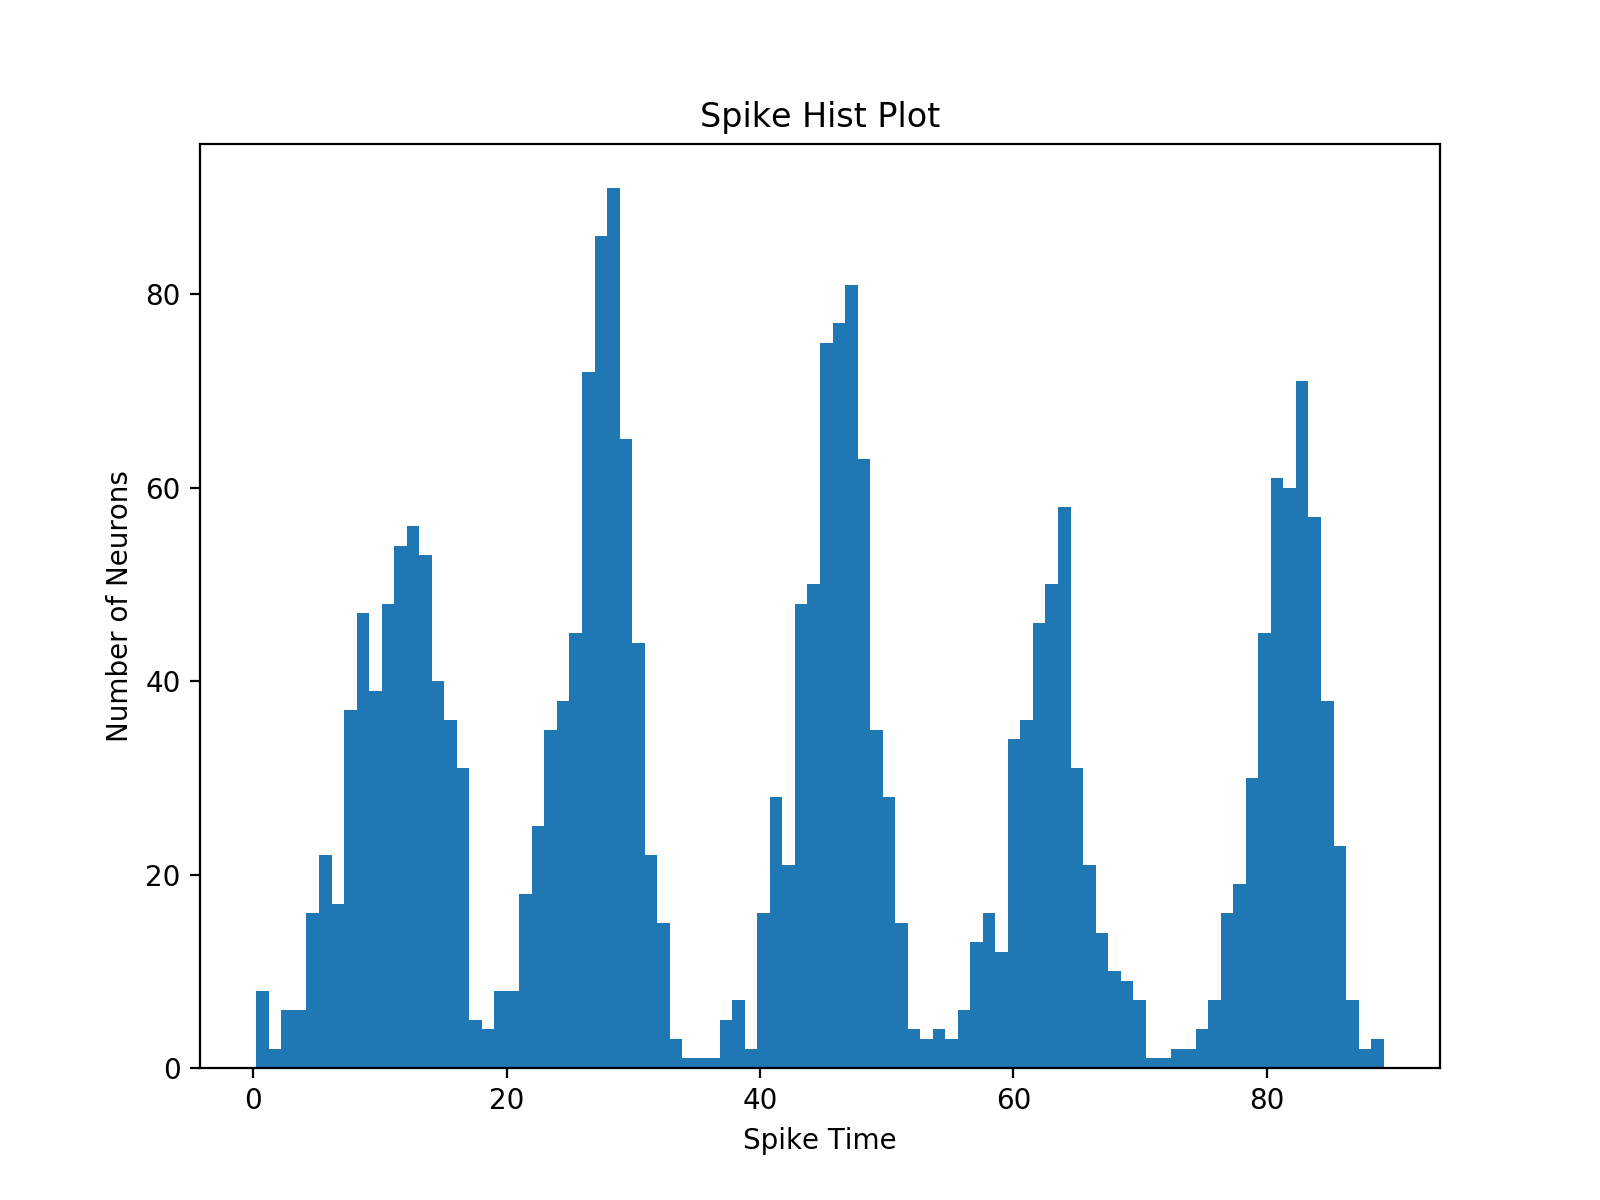

Text(0, 0.5, 'Number of Neurons')

In [39]:
# Histogram 
merged_slice3_list = list(itertools.chain(*list(slice3)))
merged_slice3_array = np.asarray(merged_slice3_list)

plt.figure(figsize=(8,6), num='Histogram Community3')
bin_coord = plt.hist(merged_slice3_array, bins= 90 )
plt.title("Spike Hist Plot")
plt.xlabel("Spike Time")
plt.ylabel("Number of Neurons")

<IPython.core.display.Javascript object>


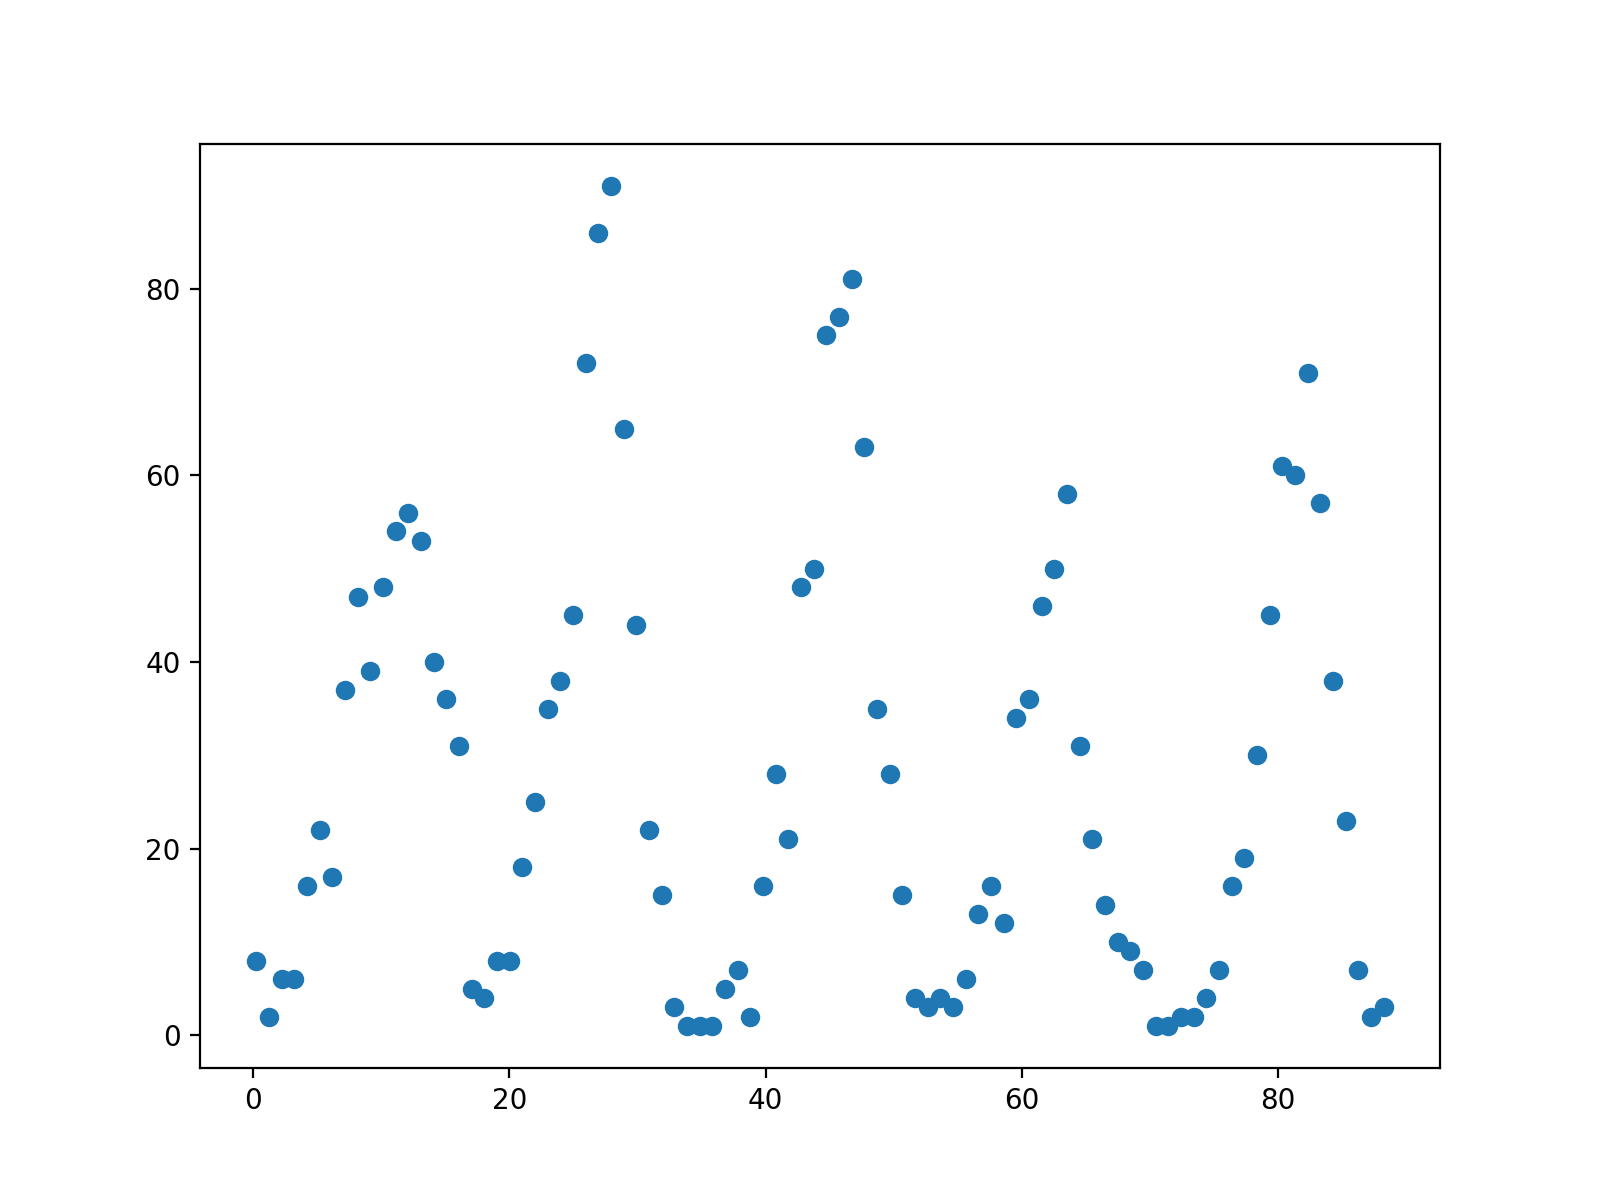

In [40]:
#bin_coord[0] # value at each bin 
#bin_coord[1] # bin locatio (x-axis )
X = bin_coord[1][:-1]
y = bin_coord[0]
plt.figure(figsize=(8,6), num = "Curve From Hist Com3")
plt.scatter(X,y)
plt.show()

In [41]:
from sklearn.mixture import GaussianMixture

In [42]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [43]:
gmm = GaussianMixture(n_components=5).fit(X)
labels_gmm = gmm.predict(X)

<IPython.core.display.Javascript object>


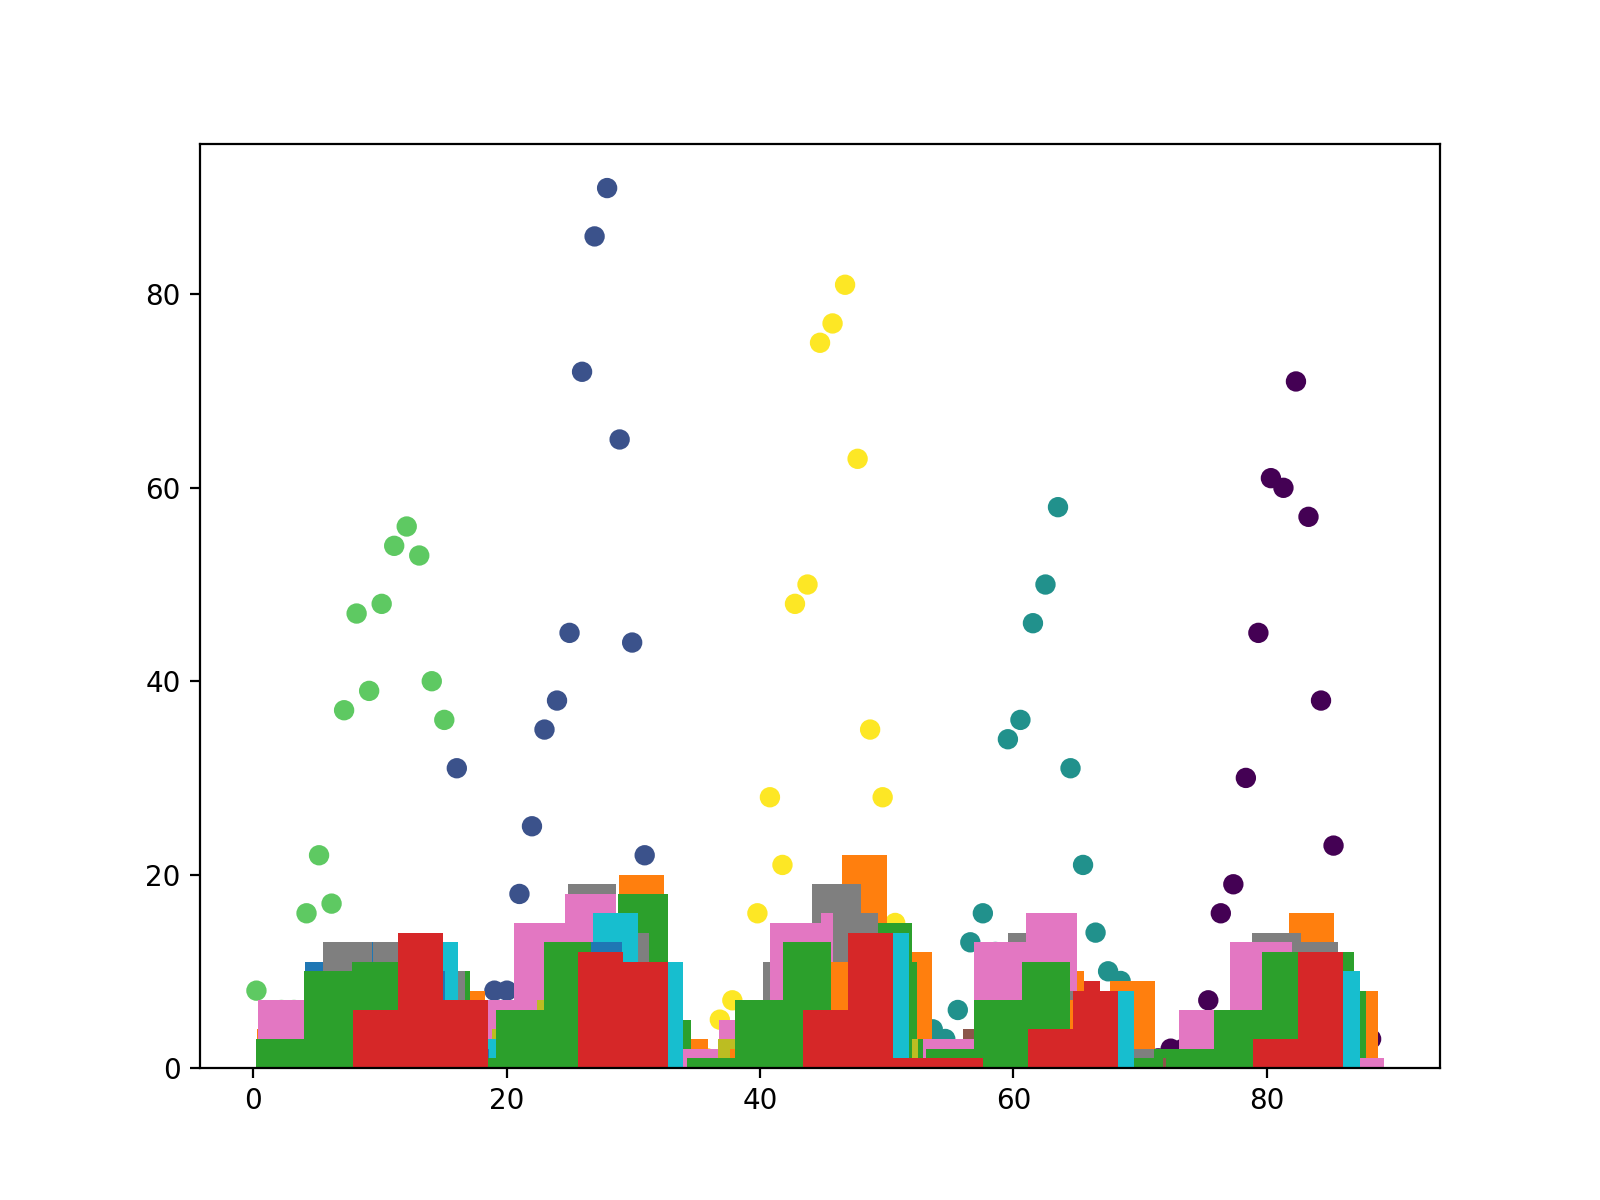

In [44]:
plt.figure(figsize=(8,6), num = "Gaussian Mixture Model")
plt.scatter(X[:,0], y, c=labels_gmm, s=40, cmap='viridis')
plt.show()

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

<IPython.core.display.Javascript object>


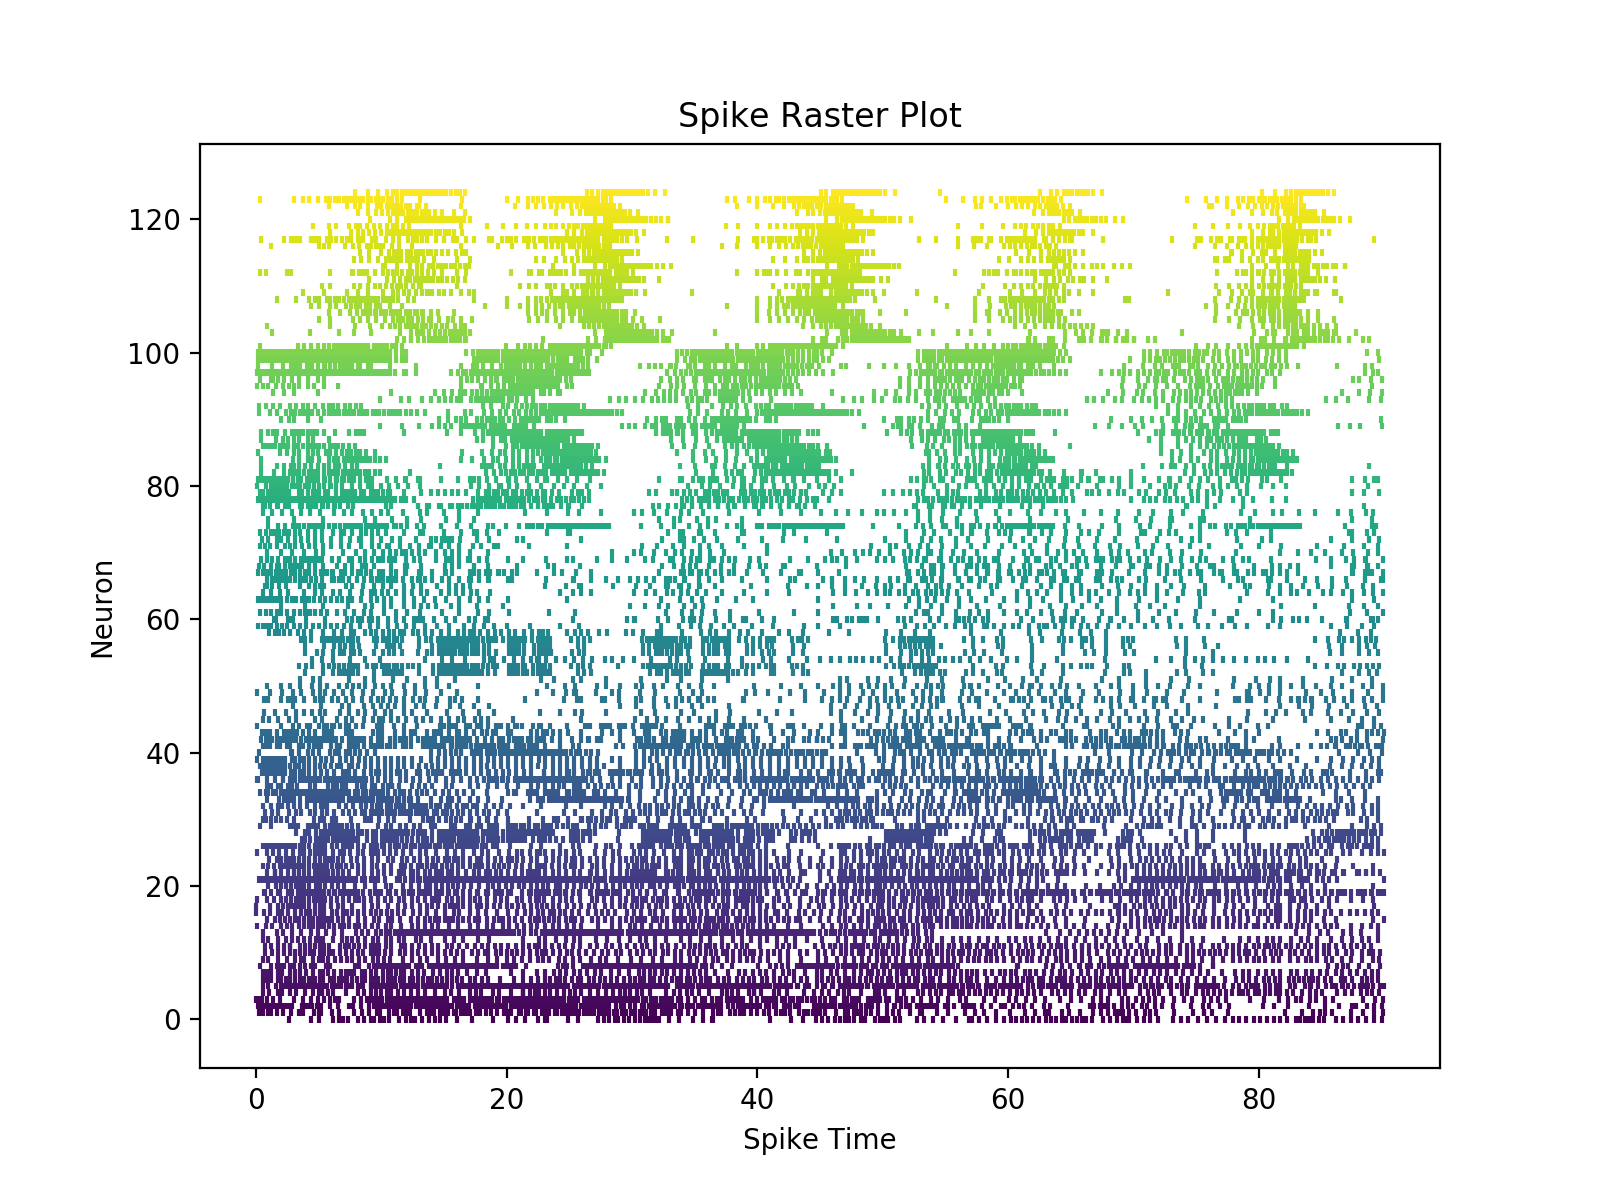

Text(0, 0.5, 'Neuron')

In [233]:
#Plotting every time series but ordered by community 
plt.figure(figsize=(8,6), num = "Raster All")
plt.eventplot(coms_multi_dim_array1 , colors= viridis(np.linspace(0, 1, len(coms_multi_dim_array1))))
plt.title("Spike Raster Plot")
plt.xlabel("Spike Time")
plt.ylabel("Neuron")

## Spike Trains Measure for defining types

In [122]:
# We're gonna implement some functions in order to get new input variables for the "fit space" model  

def cv2_holt_measure(spike_train): 
    import numpy as np
    
    cv2_pivot = []
    for i in range(0, len(spike_train)-1):
        cv2_instant = (2*np.abs(spike_train[i]-spike_train[i+1]))/(spike_train[i]+spike_train[i+1])
        cv2_pivot.append(cv2_instant)

    cv2_final = np.asarray(cv2_pivot)
    
    return cv2_final 
    
        
def cv2_holt_measure_ensemble(ensemble):
    
    cv2_ensemble_list = []
    for row in range(0, len(ensemble)):
        cv2_ensemble_list.append(cv2_holt_measure(ensemble[row]))
        
    cv2_ensemble = np.asarray(cv2_ensemble_list)
    
    return cv2_ensemble

def interspike_interval(spike_train):
    import numpy as np
    
    isi_pivot = []
    for i in range(0, len(spike_train)-1):
        isi_instant = np.abs(spike_train[i]-spike_train[i+1])
        isi_pivot.append(isi_instant)

    isi_final = np.asarray(isi_pivot)
    
    return isi_final 


def interspike_interval_ensemble(ensemble):
    
    isi_ensemble_list = []
    for row in range(0, len(ensemble)):
        isi_ensemble_list.append(interspike_interval(ensemble[row]))
        
    isi_ensemble = np.asarray(isi_ensemble_list)
    
    return isi_ensemble  


def mean_cv2_ensemble(ensemble):
    
    cv2_ensemble = cv2_holt_measure_ensemble(ensemble)
    
    cv2_mean_list = []
    for row in range(0, len(cv2_ensemble)):
        cv2_mean_list.append(np.mean(cv2_ensemble[row]))
        
        
    mean_cv2_ensemble = np.asarray(cv2_mean_list)    
    return mean_cv2_ensemble
        
def std_cv2_ensemble(ensemble):
    
    cv2_ensemble = cv2_holt_measure_ensemble(ensemble)
    
    cv2_std_list = []
    for row in range(0, len(cv2_ensemble)):
        cv2_std_list.append(np.std(cv2_ensemble[row]))
        
    
    std_cv2_ensemble = np.asarray(cv2_std_list)
    return std_cv2_ensemble

def mean_isi_ensemble(ensemble):
    
    isi_ensemble = interspike_interval_ensemble(ensemble)
    
    isi_mean_list = []
    for row in range(0, len(isi_ensemble)):
        isi_mean_list.append(np.mean(isi_ensemble[row]))
        
        
    mean_isi_ensemble = np.asarray(isi_mean_list)    
    return mean_isi_ensemble
        
def std_isi_ensemble(ensemble):
    
    isi_ensemble = interspike_interval_ensemble(ensemble)
    
    isi_std_list = []
    for row in range(0, len(isi_ensemble)):
        isi_std_list.append(np.std(isi_ensemble[row]))
        
    
    std_isi_ensemble = np.asarray(isi_std_list)
    return std_isi_ensemble

In [153]:
# New Features 
isi_ensemble = interspike_interval_ensemble(coms_multi_dim_array1)
cv2_ensemble = cv2_holt_measure_ensemble(coms_multi_dim_array1)
isi_mean = mean_isi_ensemble(coms_multi_dim_array1)
isi_std = std_isi_ensemble(coms_multi_dim_array1)
cv2_mean = mean_cv2_ensemble(coms_multi_dim_array1)
cv2_std = std_cv2_ensemble(coms_multi_dim_array1)

# Input array
x_features = np.transpose(np.array([isi_mean, isi_std, cv2_mean, cv2_std]))

In [176]:
from sklearn.cluster import KMeans
import collections

In [154]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(x_features)

In [158]:
y_kmeans = kmeans.predict(x_features)

In [177]:
collections.Counter(y_kmeans)

Counter({1: 42, 2: 32, 3: 38, 0: 13})

In [217]:
len(slice0) + len(slice1) + len(slice2)

101

<IPython.core.display.Javascript object>


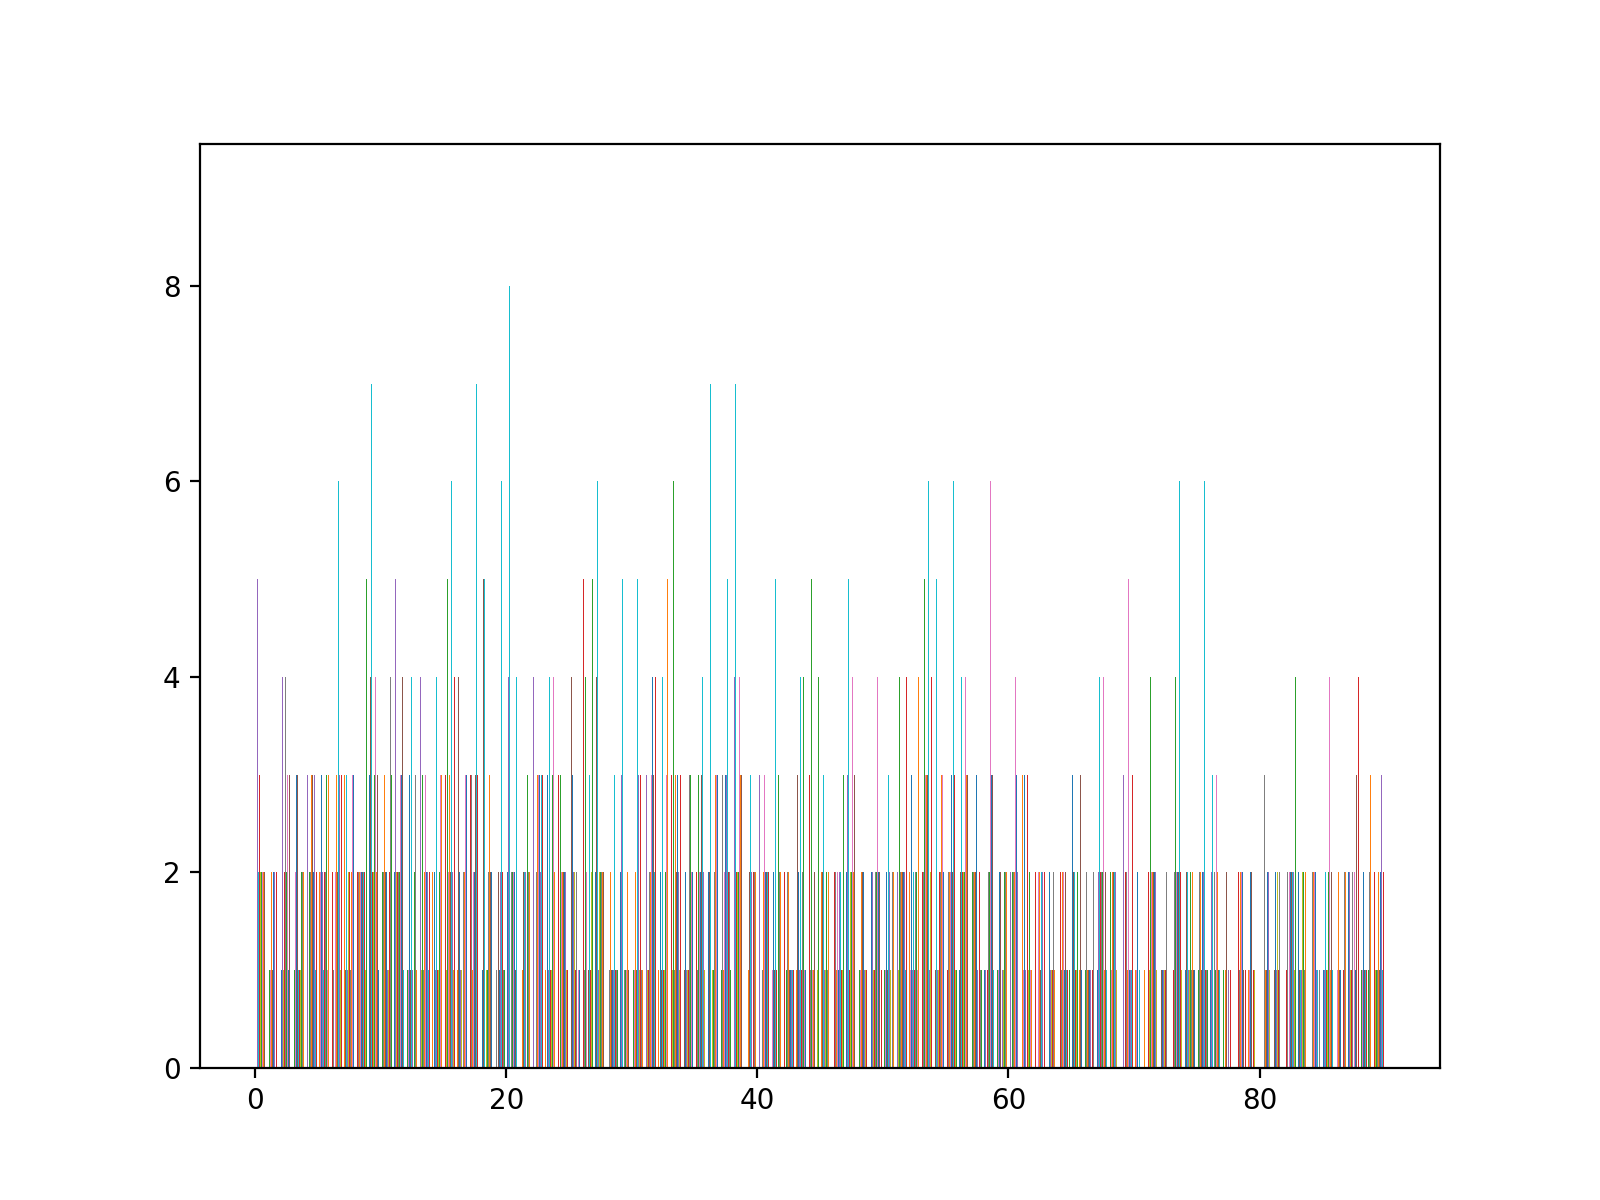

In [364]:
plt.figure(figsize=(8,6), num="Prova1")
plt.hist(, bins= 90)
plt.show()

## PCA and Dimensionality Dynamics 

In [211]:
# Let's try to Apply PCA on those spikeTrains 
# First let's divide our time series in 4.25second bins  (As in the paper)
def export_bin_coord(spike_train):
    bin_coord = plt.hist(spike_train, bins= 22)
    #bin_mean_value = bin_coord[1][:-1]
    bin_peak = bin_coord[0]
    
    return(bin_peak)

def export_bin_coord_ensemble(ensemble):
    bin_ensemble_list = []
    for row in range(0,len(ensemble)):
        bin_ensemble_list.append(export_bin_coord(ensemble[row]))
        
    bin_ensemble_array = np.asarray(bin_ensemble_list)
    return bin_ensemble_array
        

In [226]:
bin_slice3 = export_bin_coord_ensemble(slice3)

In [227]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(bin_slice3)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [228]:
print(pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]+ pca.explained_variance_ratio_[2])

0.8253843030180241


In [229]:
pca_bin_slice3 = pca.transform(bin_slice3) 

In [230]:
print(bin_slice3.shape)

(24, 22)


In [231]:
from mpl_toolkits.mplot3d import Axes3D 

<IPython.core.display.Javascript object>


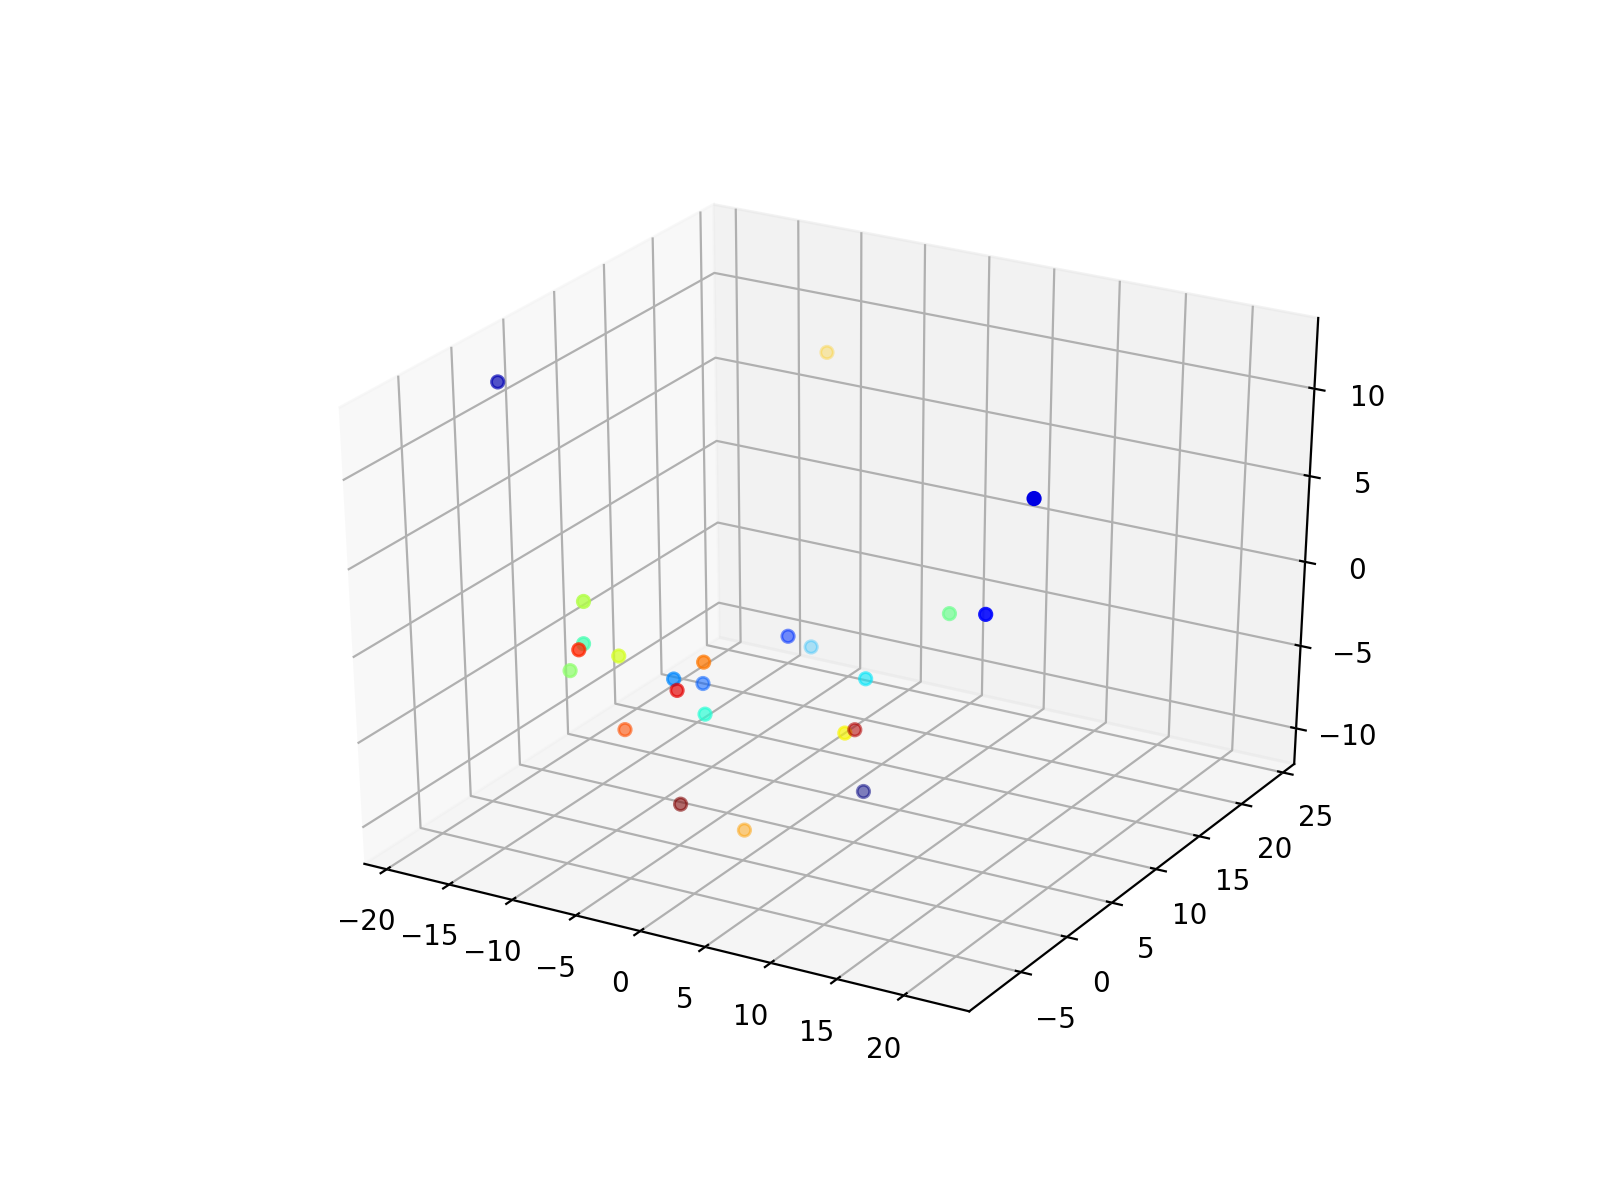

In [491]:
x = pca_bin_slice3[:,0]
y = pca_bin_slice3[:,1]
z = pca_bin_slice3[:,2]

zline = np.linspace(-15, 20, 1000)
xline = np.sin(zline)
yline = np.cos(zline)


fig = plt.figure(figsize=(8,6), num = "PC1,PC2, PC3")
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z, c = np.linspace(0,1, num=len(pca_bin_slice3)), cmap="jet")
#ax.plot3D(x,y,z)
#plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


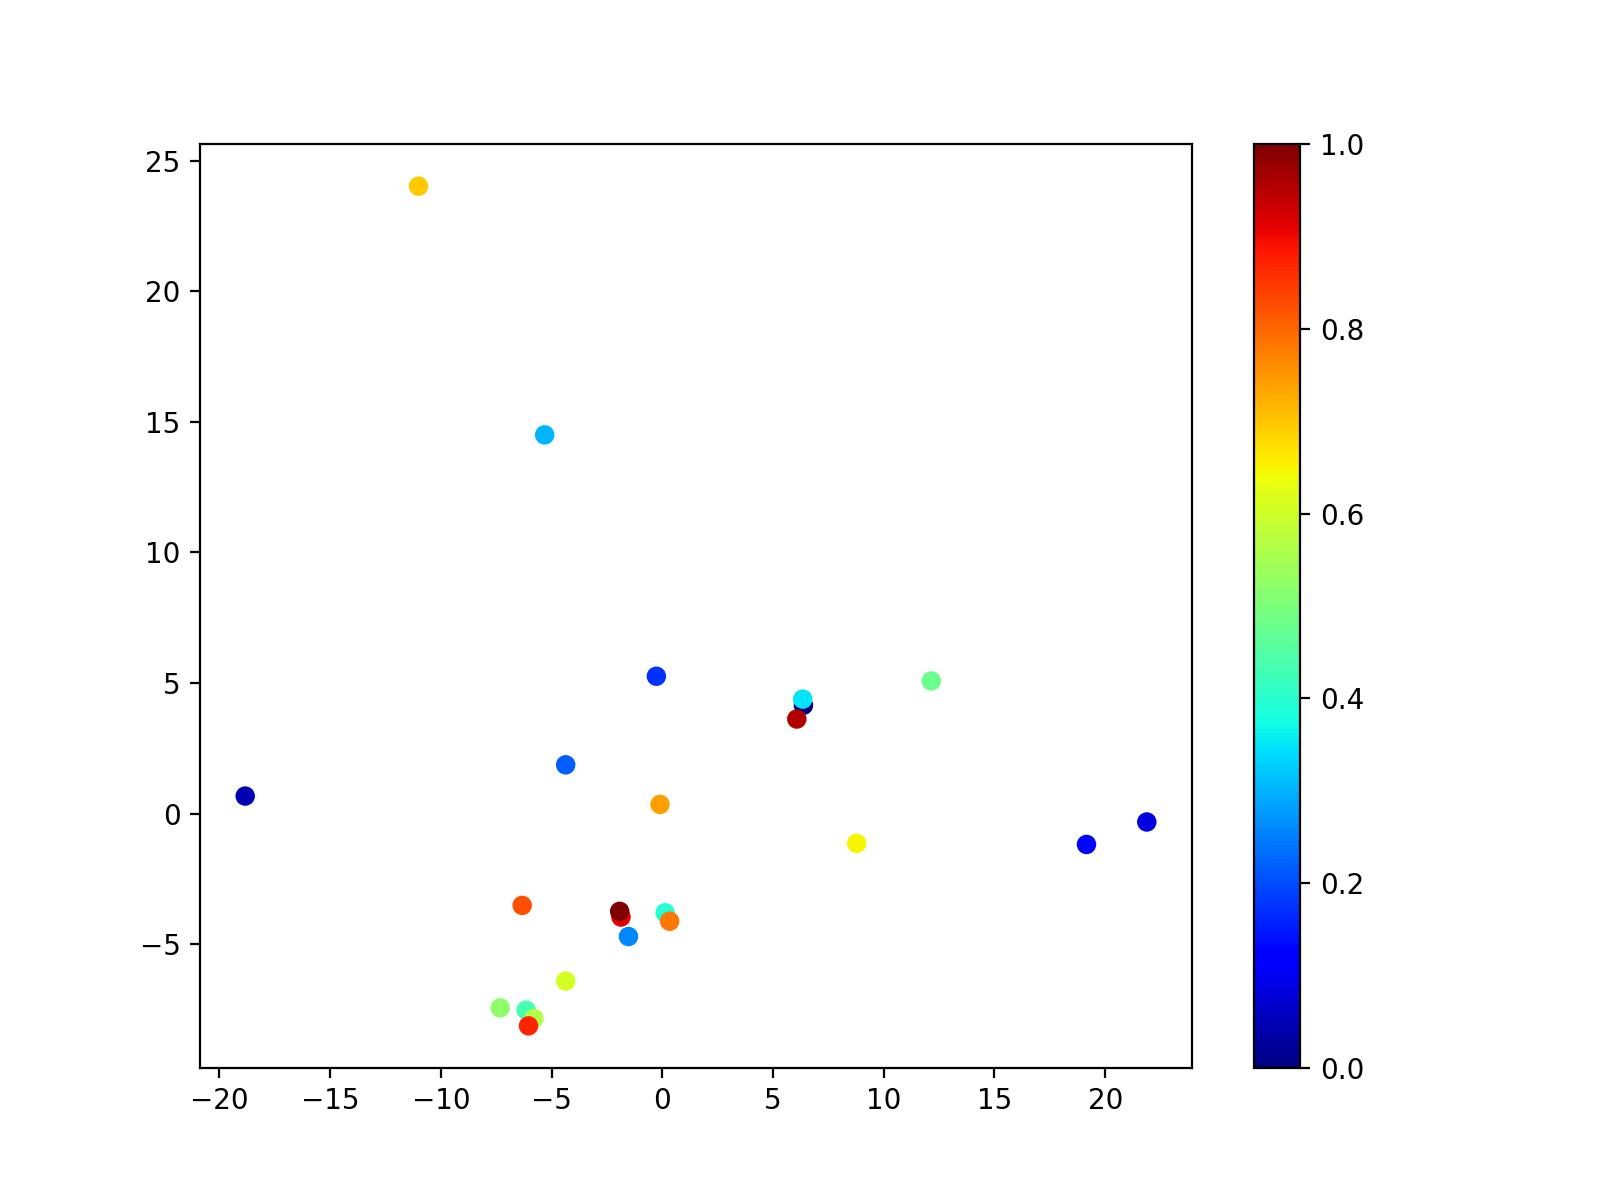

In [237]:
plt.figure(figsize=(8,6), num = "PC1,PC2")
plt.scatter(x, y,  c = np.linspace(0,1, num=len(pca_bin_slice3)), cmap="jet")
#ax.plot(x,y)
plt.colorbar()
plt.show()

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#